<div class="alert alert-block alert-info">

[1. Import](#1st-bullet)<br>
- [1.1 Import libraries](#2nd-bullet)<br>
- [1.2 Import the dataset](#3rd-bullet)<br>
 
[2. Data Exploration](#4th-bullet)<br>
- [2.1 Coeherence Check](#5th-bullet)<br>
- [2.2 Outliers](#6th-bullet)<br>   
    - [2.2.1 Manual Filter](#7th-bullet)<br>
    - [2.2.2 IQR method](#8th-bullet)<br>
    - [2.2.3 Multi-dimentional outliers](#8th-bullet)<br>
- [2.3 Scale the data](#9th-bullet)<br>
- [2.4 Missing Values](#10th-bullet)<br>
    - [2.4.1 KNN](#11th-bullet)<br>
    - [2.4.2 Median, Mode](#12th-bullet)<br>
- [2.5 Feature Engineering](#13th-bullet)<br>
- [2.6 Scale the data](#14th-bullet)<br>
- [2.7 Feature Selection](#15th-bullet)<br>
      


</div>

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 1. Import
       
</div>

<a class="anchor" id="2nd-bullet">

### 1.1. Import libraries
    
</a>

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from pandas_profiling import ProfileReport
import os

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

# Seeting seaborn style
sns.set()

In [132]:
import pyreadstat

<a class="anchor" id="3rd-bullet">

### 1.1. Import dataset
    
</a>

In [133]:
data, meta = pyreadstat.read_sas7bdat('a2z_insurance.sas7bdat')

In [134]:
# DM_profiling_report = ProfileReport(data, title="DM Pandas Profiling Report", explorative=True)
# DM_profiling_report.to_notebook_iframe()

In [135]:
#DM_profiling_report.to_file("DM_profiling_report.html")

<div class="alert alert-block alert-success">

<a class="anchor" id="4rd-bullet">    </a>
## 1. Data Exploration
       
</div>

In [136]:
data

CustID  FirstPolYear  BirthYear          EducDeg  MonthSal  \
0          1.0        1985.0     1982.0  2 - High School    2177.0   
1          2.0        1981.0     1995.0  2 - High School     677.0   
2          3.0        1991.0     1970.0        1 - Basic    2277.0   
3          4.0        1990.0     1981.0      3 - BSc/MSc    1099.0   
4          5.0        1986.0     1973.0      3 - BSc/MSc    1763.0   
...        ...           ...        ...              ...       ...   
10291  10292.0        1984.0     1949.0          4 - PhD    3188.0   
10292  10293.0        1977.0     1952.0        1 - Basic    2431.0   
10293  10294.0        1994.0     1976.0      3 - BSc/MSc    2918.0   
10294  10295.0        1981.0     1977.0        1 - Basic    1971.0   
10295  10296.0        1990.0     1981.0          4 - PhD    2815.0   

       GeoLivArea  Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
0             1.0       1.0      380.97        0.39     375.85          79.45   
1             4.0       1.0     -131.13        1.12      77.46         416.20   
2             3.0       0.0      504.67        0.28     206.15         224.50   
3             4.0       1.0      -16.99        0.99     182.48          43.35   
4             4.0       1.0       35.23        0.90     338.62          47.80   
...           ...       ...         ...         ...        ...            ...   
10291         2.0       0.0       -0.11        0.96     393.74          49.45   
10292         3.0       0.0     1405.60        0.00     133.58        1035.75   
10293         1.0       1.0      524.10        0.21     403.63         132.80   
10294         2.0       1.0      250.05        0.65     188.59         211.15   
10295         1.0       1.0      463.75        0.27     414.08          94.45   

       PremHealth  PremLife  PremWork  
0          146.36     47.01     16.89  
1          116.69    194.48    106.13  
2          124.58     86.35     99.02  
3          311.17     35.34     28.34  
4          182.59     18.78     41.45  
...           ...       ...       ...  
10291      173.81      9.78     14.78  
10292      143.25     12.89    105.13  
10293      142.25     12.67      4.89  
10294      198.37     63.90    112.91  
10295      141.25      6.89     12.89  

[10296 rows x 14 columns]

In [137]:
data.set_index('CustID',inplace=True)

In [138]:
data.describe().T

count         mean          std        min      25%      50%  \
FirstPolYear   10266.0  1991.062634   511.267913    1974.00  1980.00  1986.00   
BirthYear      10279.0  1968.007783    19.709476    1028.00  1953.00  1968.00   
MonthSal       10260.0  2506.667057  1157.449634     333.00  1706.00  2501.50   
GeoLivArea     10295.0     2.709859     1.266291       1.00     1.00     3.00   
Children       10275.0     0.706764     0.455268       0.00     0.00     1.00   
CustMonVal     10296.0   177.892605  1945.811505 -165680.42    -9.44   186.87   
ClaimsRate     10296.0     0.742772     2.916964       0.00     0.39     0.72   
PremMotor      10262.0   300.470252   211.914997      -4.11   190.59   298.61   
PremHousehold  10296.0   210.431192   352.595984     -75.00    49.45   132.80   
PremHealth     10253.0   171.580833   296.405976      -2.11   111.80   162.81   
PremLife       10192.0    41.855782    47.480632      -7.00     9.89    25.56   
PremWork       10210.0    41.277514    51.513572     -12.00    10.67    25.67   

                     75%       max  
FirstPolYear   1992.0000  53784.00  
BirthYear      1983.0000   2001.00  
MonthSal       3290.2500  55215.00  
GeoLivArea        4.0000      4.00  
Children          1.0000      1.00  
CustMonVal      399.7775  11875.89  
ClaimsRate        0.9800    256.20  
PremMotor       408.3000  11604.42  
PremHousehold   290.0500  25048.80  
PremHealth      219.8200  28272.00  
PremLife         57.7900    398.30  
PremWork         56.7900   1988.70

In [139]:
data[data['EducDeg']==''].sample()

FirstPolYear  BirthYear EducDeg  MonthSal  GeoLivArea  Children  \
CustID                                                                    
9611.0           NaN     1964.0            2905.0         1.0       1.0   

        CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
CustID                                                                 
9611.0      -70.34        1.06     273.72          211.7       229.6   

        PremLife  PremWork  
CustID                      
9611.0      9.89     45.34

In [140]:
# replace "" by nans
maybe_nan=['_','',' ','  ','/','%']
data.replace(maybe_nan, np.nan, inplace=True)

# count of missing values
data.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [141]:
data.insert(4,'EducDeg_cat',data['EducDeg'].str[4:])

In [142]:
data.insert(4,'EducDeg_ord',data['EducDeg'].str[0])

In [143]:
data.dtypes

FirstPolYear     float64
BirthYear        float64
EducDeg           object
MonthSal         float64
EducDeg_ord       object
EducDeg_cat       object
GeoLivArea       float64
Children         float64
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
dtype: object

In [144]:
data.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
EducDeg_ord       17
EducDeg_cat       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [145]:
# pd.Int32Dtype() due to nan values
data['FirstPolYear']=data['FirstPolYear'].astype(pd.Int32Dtype())
data['BirthYear']=data['BirthYear'].astype(pd.Int32Dtype())
data['Children']=data['Children'].astype(pd.Int32Dtype())
data['GeoLivArea']=data['GeoLivArea'].astype(pd.Int32Dtype())
data['CustMonVal']=data['CustMonVal'].astype(pd.Float32Dtype())
data['ClaimsRate']=data['ClaimsRate'].astype(pd.Float32Dtype())
data['PremMotor']=data['PremMotor'].astype(pd.Float32Dtype())
data['PremHousehold']=data['PremHousehold'].astype(pd.Float32Dtype())
data['PremHealth']=data['PremHealth'].astype(pd.Float32Dtype())
data['PremLife']=data['PremLife'].astype(pd.Float32Dtype())
data['PremWork']=data['PremWork'].astype(pd.Float32Dtype())

data['EducDeg_cat']=data['EducDeg_cat'].astype(pd.StringDtype())

data['EducDeg_ord'] = data['EducDeg_ord'].astype('float').astype('Int32')


In [146]:
data.dtypes

FirstPolYear       Int32
BirthYear          Int32
EducDeg           object
MonthSal         float64
EducDeg_ord        Int32
EducDeg_cat       string
GeoLivArea         Int32
Children           Int32
CustMonVal       Float32
ClaimsRate       Float32
PremMotor        Float32
PremHousehold    Float32
PremHealth       Float32
PremLife         Float32
PremWork         Float32
dtype: object

In [147]:
# Check for duplicated rows -- 3 duplicates
data[data.duplicated()]#.sum()
# dropping all duplicates
data.drop_duplicates(inplace=True)

In [148]:
data

FirstPolYear  BirthYear          EducDeg  MonthSal  EducDeg_ord  \
CustID                                                                     
1.0              1985       1982  2 - High School    2177.0            2   
2.0              1981       1995  2 - High School     677.0            2   
3.0              1991       1970        1 - Basic    2277.0            1   
4.0              1990       1981      3 - BSc/MSc    1099.0            3   
5.0              1986       1973      3 - BSc/MSc    1763.0            3   
...               ...        ...              ...       ...          ...   
10292.0          1984       1949          4 - PhD    3188.0            4   
10293.0          1977       1952        1 - Basic    2431.0            1   
10294.0          1994       1976      3 - BSc/MSc    2918.0            3   
10295.0          1981       1977        1 - Basic    1971.0            1   
10296.0          1990       1981          4 - PhD    2815.0            4   

         EducDeg_cat  GeoLivArea  Children   CustMonVal  ClaimsRate  \
CustID                                                                
1.0      High School           1         1   380.970001        0.39   
2.0      High School           4         1  -131.130005        1.12   
3.0            Basic           3         0   504.670013        0.28   
4.0          BSc/MSc           4         1       -16.99        0.99   
5.0          BSc/MSc           4         1        35.23         0.9   
...              ...         ...       ...          ...         ...   
10292.0          PhD           2         0        -0.11        0.96   
10293.0        Basic           3         0  1405.599976         0.0   
10294.0      BSc/MSc           1         1   524.099976        0.21   
10295.0        Basic           2         1   250.050003        0.65   
10296.0          PhD           1         1       463.75        0.27   

          PremMotor  PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                                  
1.0      375.850006      79.449997  146.360001   47.009998   16.889999  
2.0       77.459999     416.200012  116.690002  194.479996  106.129997  
3.0      206.149994          224.5  124.580002   86.349998   99.019997  
4.0      182.479996      43.349998  311.170013       35.34       28.34  
5.0      338.619995      47.799999  182.589996   18.780001   41.450001  
...             ...            ...         ...         ...         ...  
10292.0   393.73999      49.450001  173.809998        9.78       14.78  
10293.0  133.580002        1035.75      143.25       12.89  105.129997  
10294.0  403.630005     132.800003      142.25       12.67        4.89  
10295.0  188.589996     211.149994  198.369995   63.900002  112.910004  
10296.0  414.079987      94.449997      141.25        6.89       12.89  

[10293 rows x 15 columns]

In [149]:
data.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
EducDeg_ord       17
EducDeg_cat       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [150]:
data_treat=data.copy()

In [151]:
data_treat

FirstPolYear  BirthYear          EducDeg  MonthSal  EducDeg_ord  \
CustID                                                                     
1.0              1985       1982  2 - High School    2177.0            2   
2.0              1981       1995  2 - High School     677.0            2   
3.0              1991       1970        1 - Basic    2277.0            1   
4.0              1990       1981      3 - BSc/MSc    1099.0            3   
5.0              1986       1973      3 - BSc/MSc    1763.0            3   
...               ...        ...              ...       ...          ...   
10292.0          1984       1949          4 - PhD    3188.0            4   
10293.0          1977       1952        1 - Basic    2431.0            1   
10294.0          1994       1976      3 - BSc/MSc    2918.0            3   
10295.0          1981       1977        1 - Basic    1971.0            1   
10296.0          1990       1981          4 - PhD    2815.0            4   

         EducDeg_cat  GeoLivArea  Children   CustMonVal  ClaimsRate  \
CustID                                                                
1.0      High School           1         1   380.970001        0.39   
2.0      High School           4         1  -131.130005        1.12   
3.0            Basic           3         0   504.670013        0.28   
4.0          BSc/MSc           4         1       -16.99        0.99   
5.0          BSc/MSc           4         1        35.23         0.9   
...              ...         ...       ...          ...         ...   
10292.0          PhD           2         0        -0.11        0.96   
10293.0        Basic           3         0  1405.599976         0.0   
10294.0      BSc/MSc           1         1   524.099976        0.21   
10295.0        Basic           2         1   250.050003        0.65   
10296.0          PhD           1         1       463.75        0.27   

          PremMotor  PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                                  
1.0      375.850006      79.449997  146.360001   47.009998   16.889999  
2.0       77.459999     416.200012  116.690002  194.479996  106.129997  
3.0      206.149994          224.5  124.580002   86.349998   99.019997  
4.0      182.479996      43.349998  311.170013       35.34       28.34  
5.0      338.619995      47.799999  182.589996   18.780001   41.450001  
...             ...            ...         ...         ...         ...  
10292.0   393.73999      49.450001  173.809998        9.78       14.78  
10293.0  133.580002        1035.75      143.25       12.89  105.129997  
10294.0  403.630005     132.800003      142.25       12.67        4.89  
10295.0  188.589996     211.149994  198.369995   63.900002  112.910004  
10296.0  414.079987      94.449997      141.25        6.89       12.89  

[10293 rows x 15 columns]

<a class="anchor" id="5th-bullet">

### 2.1. Coeherence Check
    
</a>

In [152]:
# checking if the correspondance is done well
data_treat[
          ((data_treat['EducDeg_cat']=='PhD') & (data_treat['EducDeg_ord']==4))|
          ((data_treat['EducDeg_cat']=='Basic') & (data_treat['EducDeg_ord']==1))|
          ((data_treat['EducDeg_cat']=='High School') & (data_treat['EducDeg_ord']==2))|
          ((data_treat['EducDeg_cat']=='BSc/MSc') & (data_treat['EducDeg_ord']==3))]

FirstPolYear  BirthYear          EducDeg  MonthSal  EducDeg_ord  \
CustID                                                                     
1.0              1985       1982  2 - High School    2177.0            2   
2.0              1981       1995  2 - High School     677.0            2   
3.0              1991       1970        1 - Basic    2277.0            1   
4.0              1990       1981      3 - BSc/MSc    1099.0            3   
5.0              1986       1973      3 - BSc/MSc    1763.0            3   
...               ...        ...              ...       ...          ...   
10292.0          1984       1949          4 - PhD    3188.0            4   
10293.0          1977       1952        1 - Basic    2431.0            1   
10294.0          1994       1976      3 - BSc/MSc    2918.0            3   
10295.0          1981       1977        1 - Basic    1971.0            1   
10296.0          1990       1981          4 - PhD    2815.0            4   

         EducDeg_cat  GeoLivArea  Children   CustMonVal  ClaimsRate  \
CustID                                                                
1.0      High School           1         1   380.970001        0.39   
2.0      High School           4         1  -131.130005        1.12   
3.0            Basic           3         0   504.670013        0.28   
4.0          BSc/MSc           4         1       -16.99        0.99   
5.0          BSc/MSc           4         1        35.23         0.9   
...              ...         ...       ...          ...         ...   
10292.0          PhD           2         0        -0.11        0.96   
10293.0        Basic           3         0  1405.599976         0.0   
10294.0      BSc/MSc           1         1   524.099976        0.21   
10295.0        Basic           2         1   250.050003        0.65   
10296.0          PhD           1         1       463.75        0.27   

          PremMotor  PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                                  
1.0      375.850006      79.449997  146.360001   47.009998   16.889999  
2.0       77.459999     416.200012  116.690002  194.479996  106.129997  
3.0      206.149994          224.5  124.580002   86.349998   99.019997  
4.0      182.479996      43.349998  311.170013       35.34       28.34  
5.0      338.619995      47.799999  182.589996   18.780001   41.450001  
...             ...            ...         ...         ...         ...  
10292.0   393.73999      49.450001  173.809998        9.78       14.78  
10293.0  133.580002        1035.75      143.25       12.89  105.129997  
10294.0  403.630005     132.800003      142.25       12.67        4.89  
10295.0  188.589996     211.149994  198.369995   63.900002  112.910004  
10296.0  414.079987      94.449997      141.25        6.89       12.89  

[10276 rows x 15 columns]

In [153]:
# the missing records are due to nan, therefore there are no inconsistenses associated with EducDeg_cat and EducDeg_ord
10293-10276

17

In [154]:
data_treat.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
EducDeg_ord       17
EducDeg_cat       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [157]:
data_treat[(data_treat['FirstPolYear']<data_treat['BirthYear'])]

FirstPolYear  BirthYear          EducDeg  MonthSal  EducDeg_ord  \
CustID                                                                     
2.0              1981       1995  2 - High School     677.0            2   
14.0             1983       2000        1 - Basic    1043.0            1   
19.0             1981       1982        1 - Basic    1414.0            1   
23.0             1976       1986  2 - High School    1495.0            2   
41.0             1994       1995  2 - High School    1177.0            2   
...               ...        ...              ...       ...          ...   
10269.0          1987       1988      3 - BSc/MSc    1414.0            3   
10274.0          1989       1992  2 - High School    1035.0            2   
10285.0          1980       1987      3 - BSc/MSc    1504.0            3   
10289.0          1982       1993  2 - High School    1465.0            2   
10291.0          1994       1999        1 - Basic     626.0            1   

         EducDeg_cat  GeoLivArea  Children  CustMonVal  ClaimsRate  \
CustID                                                               
2.0      High School           4         1 -131.130005        1.12   
14.0           Basic           3         1  -75.120003        1.06   
19.0           Basic           3         1  230.380005        0.71   
23.0     High School           1         1  -89.790001        1.08   
41.0     High School           4         1  121.360001        0.84   
...              ...         ...       ...         ...         ...   
10269.0      BSc/MSc           3         1   50.459999         0.9   
10274.0  High School           1         1   293.51001        0.58   
10285.0      BSc/MSc           4         1       -1.55        0.96   
10289.0  High School           1         1  795.150024        0.35   
10291.0        Basic           3         1  176.259995        0.85   

          PremMotor  PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                                  
2.0       77.459999     416.200012  116.690002  194.479996  106.129997  
14.0          44.34     342.850006  127.690002  267.940002   94.459999  
19.0     313.170013     373.399994  121.800003       14.78       72.57  
23.0     209.039993     308.950012  192.479996   64.790001   54.900002  
41.0      52.009998     455.649994  135.470001  146.360001  148.029999  
...             ...            ...         ...         ...         ...  
10269.0  129.580002     167.800003  184.479996  165.919998   75.459999  
10274.0  235.710007     195.600006  103.129997  170.919998   58.119999  
10285.0  390.630005      29.450001  179.699997        -6.0        <NA>  
10289.0   67.790001     820.150024  102.129997  182.479996   86.459999  
10291.0        6.89          878.5  103.129997  113.019997  201.259995  

[1997 rows x 15 columns]

In [163]:
data_treat=data_treat.drop(columns=['BirthYear'],axis=1)

In [172]:
#isnull() to preserve the nan values

data_treat=data_treat[
#                      ((data_treat['BirthYear']<=2016) | (data_treat['BirthYear'].isnull()))&
#                      ((data_treat['BirthYear']>=2016-120)|(data_treat['BirthYear'].isnull()))&
                     ((data_treat['FirstPolYear']<=2016) |(data_treat['FirstPolYear'].isnull()))&
                     ((data_treat['FirstPolYear']>=2016-120)|(data_treat['FirstPolYear'].isnull()))&
#                     ((data_treat['FirstPolYear']>=data_treat['BirthYear'])|(data_treat['FirstPolYear'].isnull())|(data_treat['BirthYear'].isnull()))&

#                     ((((data_treat['PremMotor']>0) & (data_treat['BirthYear']>=(2016-16)))|(data_treat['PremMotor'].isnull()))|
#                      (((data_treat['PremWork']>0) & (data_treat['BirthYear']>=(2016-16)))|(data_treat['PremMotor'].isnull()))|
#                      (((data_treat['PremHousehold']>0) & (data['BirthYear']>=(2016-16)))|(data_treat['BirthYear'].isnull()))|

#                      (((data_treat['Children']==1) & (data_treat['BirthYear']<=(2016-11)))|(data_treat['BirthYear'].isnull())|(data_treat['Children'].isnull()))|
#                     (((data_treat['EducDeg']=='4 - PhD') & (data_treat['BirthYear']<=(2016-13)))|(data_treat['BirthYear'].isnull())|(data_treat['EducDeg'].isnull()))| 
                     ((((data_treat['EducDeg_cat']=='PhD') & (data_treat['EducDeg_ord']==4)) |(data_treat['EducDeg_cat'].isnull()))|
                     (((data_treat['EducDeg_cat']=='Basic') & (data_treat['EducDeg_ord']==1))|(data_treat['EducDeg_cat'].isnull()))|
                     (((data_treat['EducDeg_cat']=='High School') & (data_treat['EducDeg_ord']==2))|(data_treat['EducDeg_cat'].isnull()))|
                     (((data_treat['EducDeg_cat']=='BSc/MSc') & (data_treat['EducDeg_ord']==3))|(data_treat['EducDeg_cat'].isnull())))
      ]

In [173]:
data_treat

FirstPolYear          EducDeg  MonthSal  EducDeg_ord  EducDeg_cat  \
CustID                                                                       
1.0              1985  2 - High School    2177.0            2  High School   
2.0              1981  2 - High School     677.0            2  High School   
3.0              1991        1 - Basic    2277.0            1        Basic   
4.0              1990      3 - BSc/MSc    1099.0            3      BSc/MSc   
5.0              1986      3 - BSc/MSc    1763.0            3      BSc/MSc   
...               ...              ...       ...          ...          ...   
10292.0          1984          4 - PhD    3188.0            4          PhD   
10293.0          1977        1 - Basic    2431.0            1        Basic   
10294.0          1994      3 - BSc/MSc    2918.0            3      BSc/MSc   
10295.0          1981        1 - Basic    1971.0            1        Basic   
10296.0          1990          4 - PhD    2815.0            4          PhD   

         GeoLivArea  Children   CustMonVal  ClaimsRate   PremMotor  \
CustID                                                               
1.0               1         1   380.970001        0.39  375.850006   
2.0               4         1  -131.130005        1.12   77.459999   
3.0               3         0   504.670013        0.28  206.149994   
4.0               4         1       -16.99        0.99  182.479996   
5.0               4         1        35.23         0.9  338.619995   
...             ...       ...          ...         ...         ...   
10292.0           2         0        -0.11        0.96   393.73999   
10293.0           3         0  1405.599976         0.0  133.580002   
10294.0           1         1   524.099976        0.21  403.630005   
10295.0           2         1   250.050003        0.65  188.589996   
10296.0           1         1       463.75        0.27  414.079987   

         PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                      
1.0          79.449997  146.360001   47.009998   16.889999  
2.0         416.200012  116.690002  194.479996  106.129997  
3.0              224.5  124.580002   86.349998   99.019997  
4.0          43.349998  311.170013       35.34       28.34  
5.0          47.799999  182.589996   18.780001   41.450001  
...                ...         ...         ...         ...  
10292.0      49.450001  173.809998        9.78       14.78  
10293.0        1035.75      143.25       12.89  105.129997  
10294.0     132.800003      142.25       12.67        4.89  
10295.0     211.149994  198.369995   63.900002  112.910004  
10296.0      94.449997      141.25        6.89       12.89  

[10292 rows x 14 columns]

In [171]:
# percentage of inconsistent records
(1-(len(data_treat)/len(data)))*100

0.009715340522686855

In [275]:
data_consist=data_treat.copy()

In [276]:
data_consist.isna().sum()

FirstPolYear      30
EducDeg           17
MonthSal          36
EducDeg_ord       17
EducDeg_cat       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [277]:
# redundant variables
data_consist.drop(['EducDeg_cat', 'EducDeg'], axis=1, inplace=True)

In [278]:
data_consist.sample()

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  CustMonVal  \
CustID                                                                          
1868.0          1991     919.0            2           3         1  -88.900002   

        ClaimsRate  PremMotor  PremHousehold  PremHealth   PremLife  \
CustID                                                                
1868.0         1.1  64.790001      88.349998  258.049988  60.900002   

          PremWork  
CustID              
1868.0  189.589996

<a class="anchor" id="6th-bullet">

### 2.1. Outliers
    
</a>

In [279]:
non_metric_features = ["Children","EducDeg_ord",'GeoLivArea']
metric_features =data_consist.columns.drop(non_metric_features).to_list()
metric_features

['FirstPolYear',
 'MonthSal',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']

Text(0.5, 0.98, "Numeric Variables' Histograms")

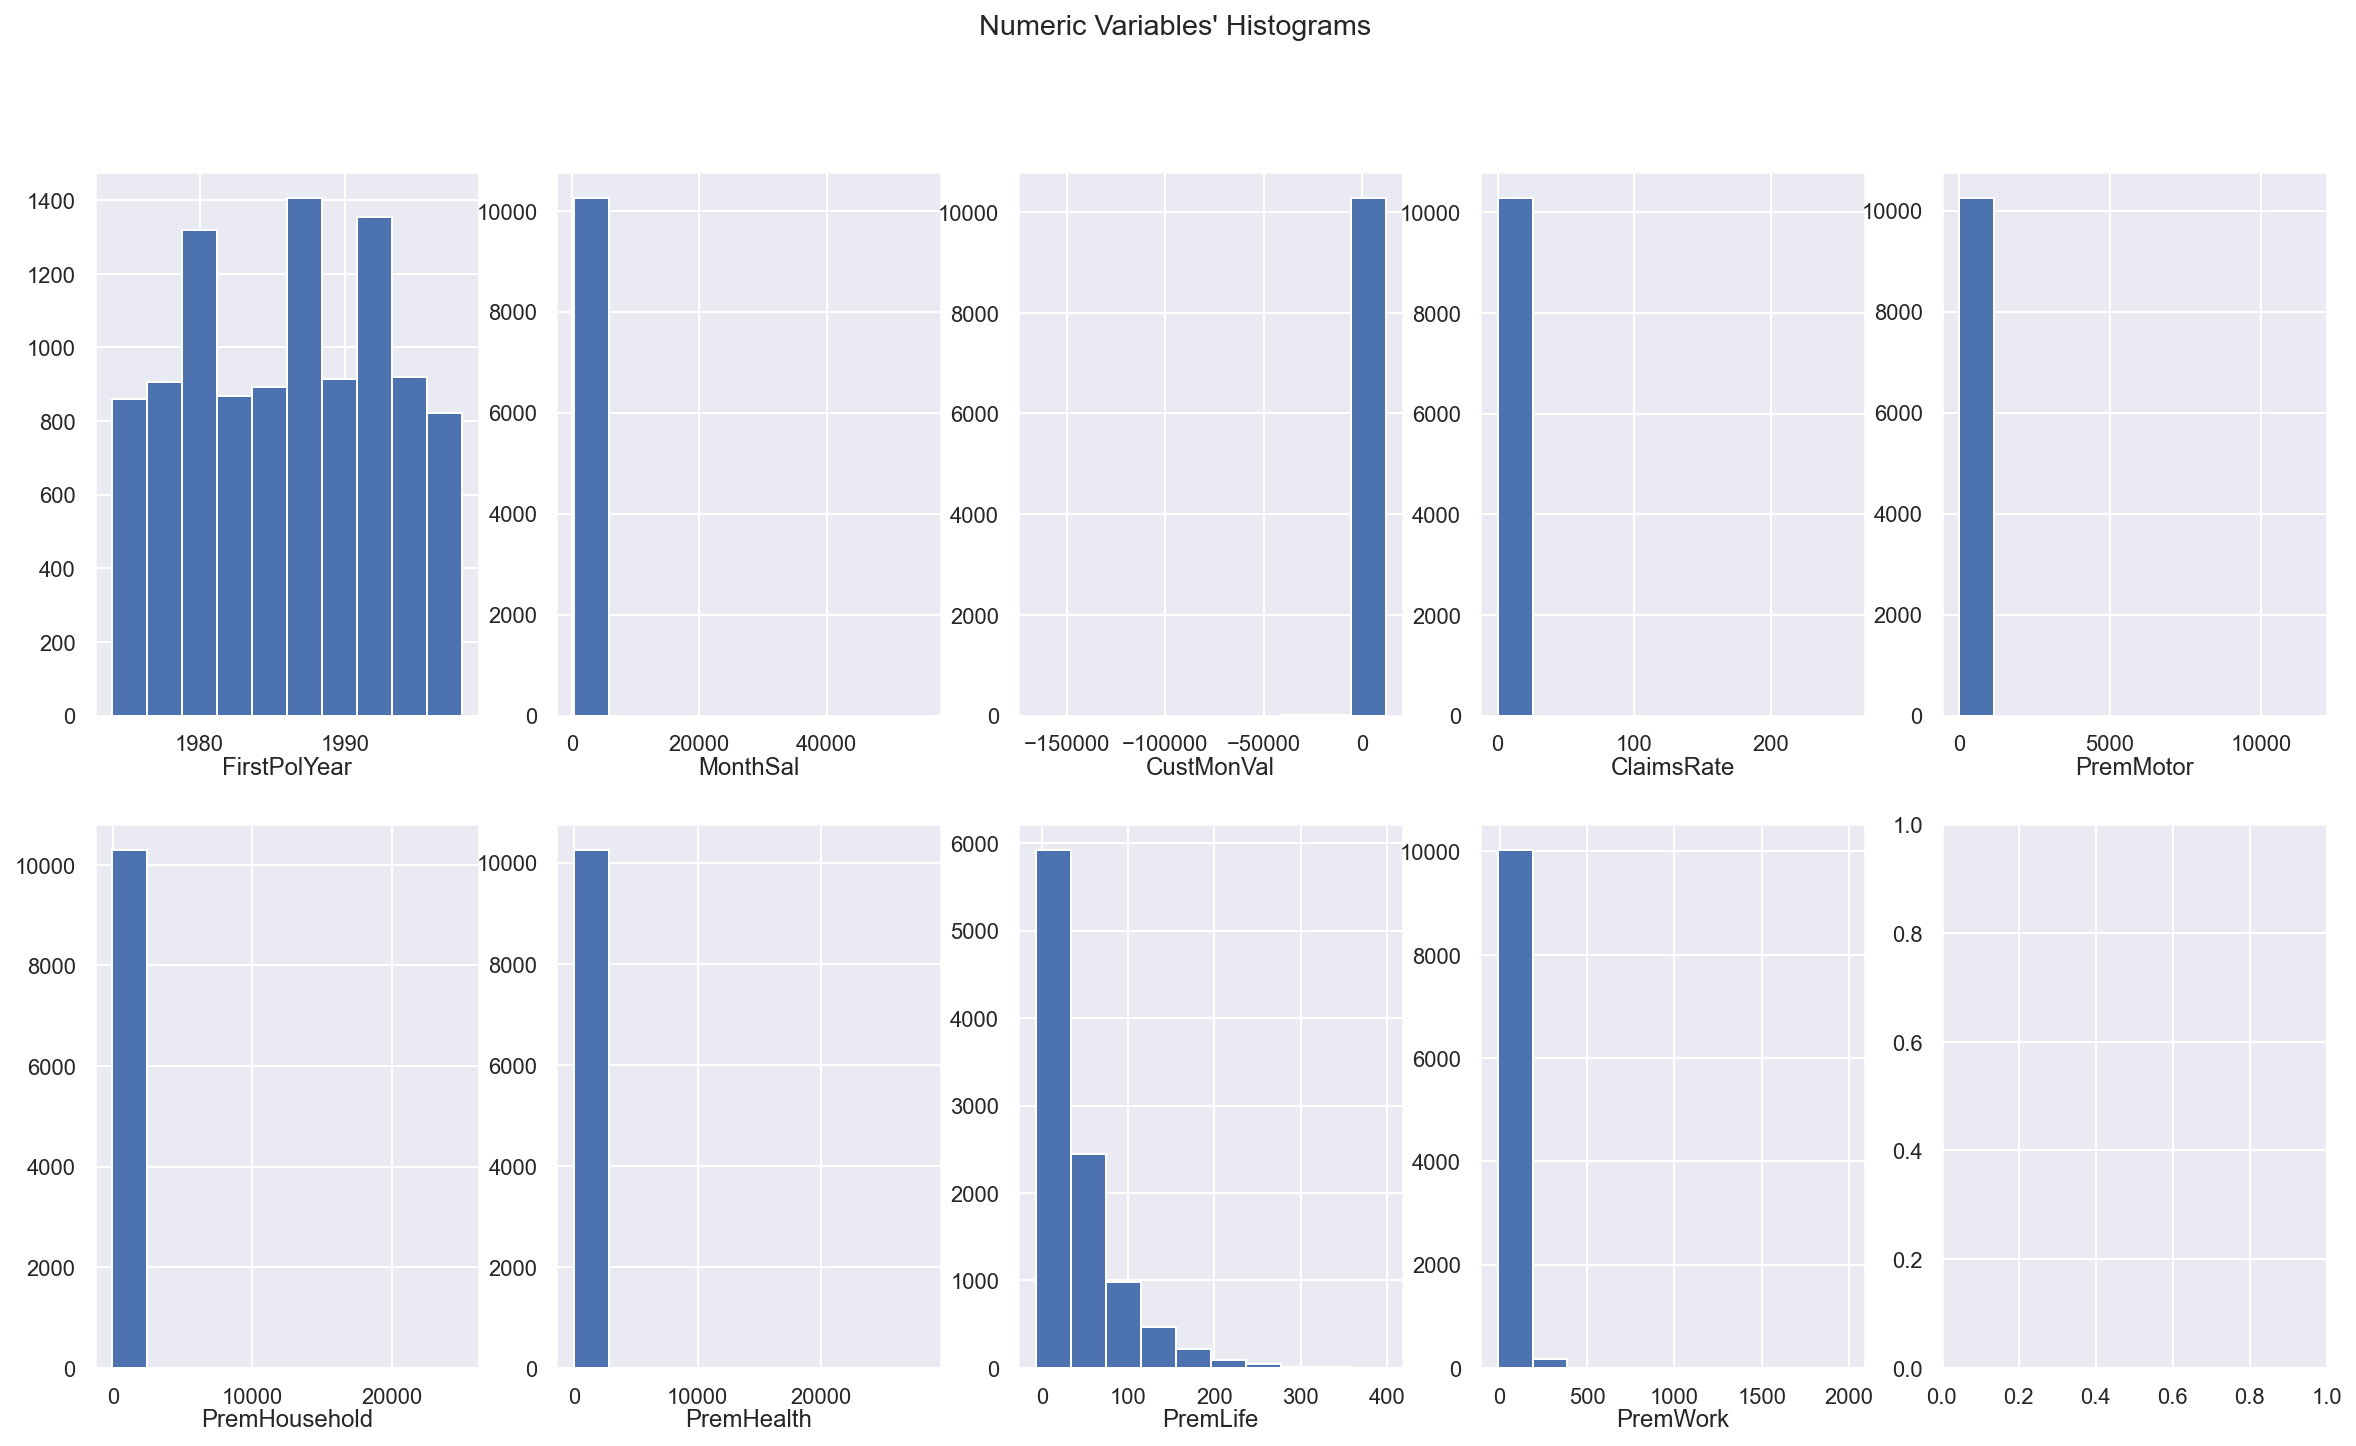

In [280]:
%matplotlib inline

sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(data_consist[feat][~np.isnan(data_consist[feat])], bins=10)  
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

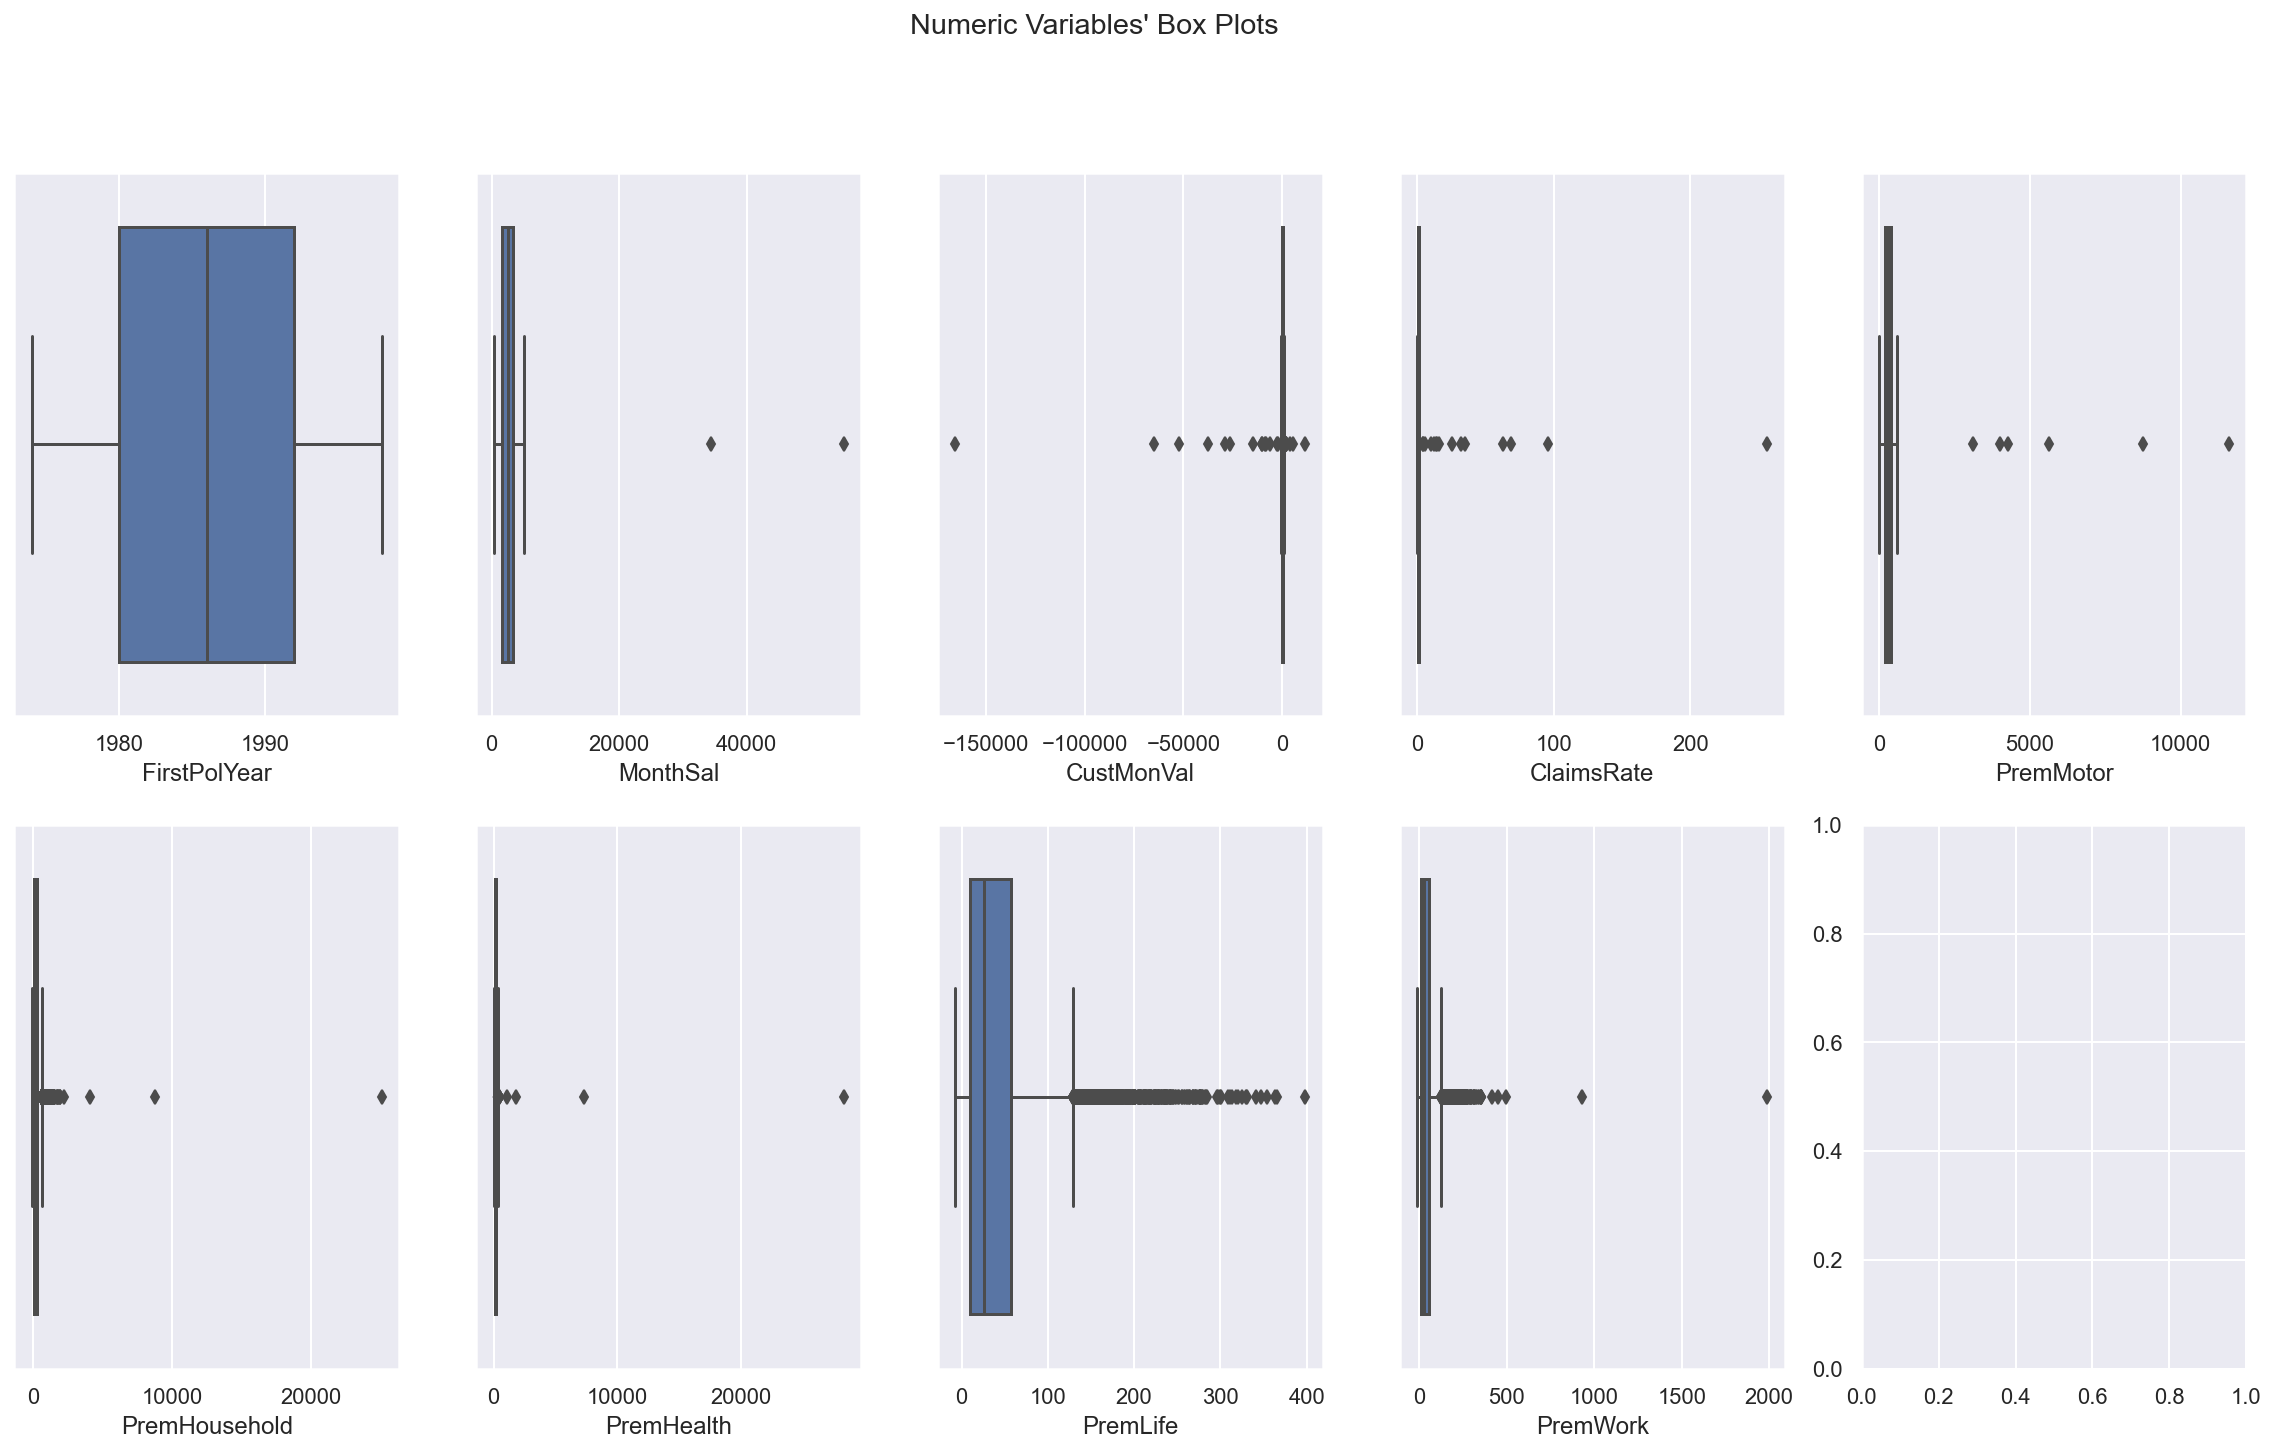

In [281]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data_consist[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

#plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

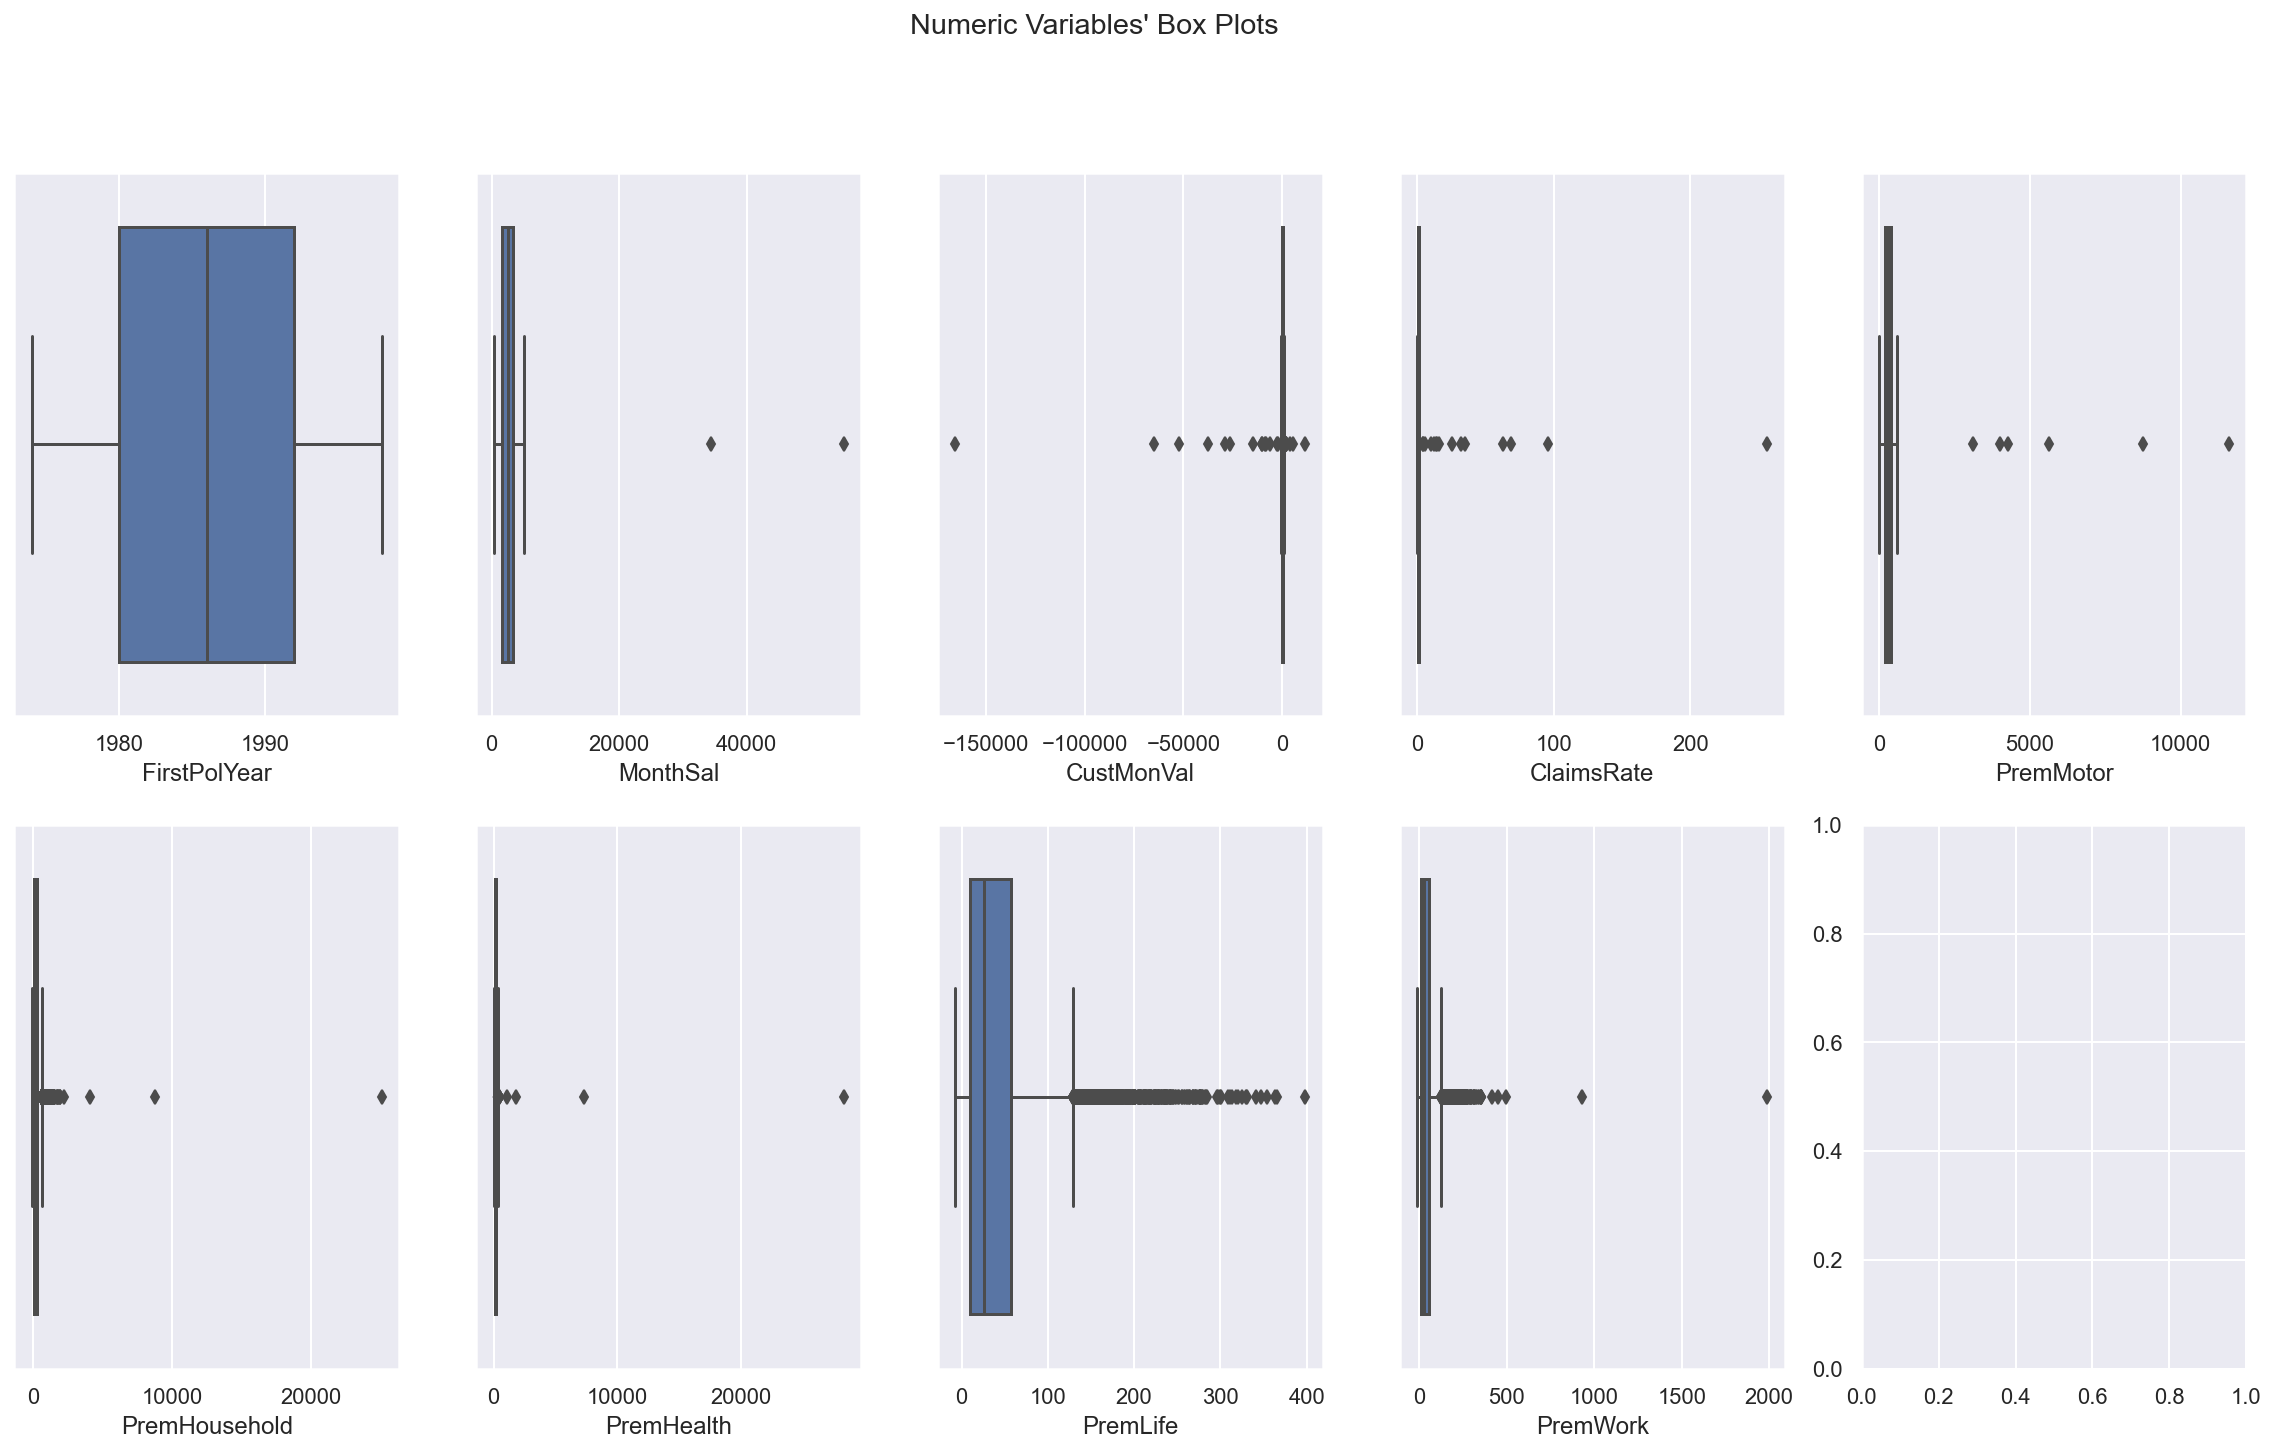

In [282]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data_consist[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

#plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

<a class="anchor" id="7th-bullet">

### 2.1.1. Manual Filter
    
</a>

In [283]:

filters1 = (
    
    ((data_consist['MonthSal']<=10000) | (data_consist['MonthSal'].isnull()))
    &
#     ((data_consist['CustMonVal']>=-20000) | (data_consist['CustMonVal'].isnull()))
#     &
    ((data_consist['CustMonVal']>=-1250) | (data_consist['CustMonVal'].isnull()))
    &
#     ((data_consist['ClaimsRate']<=50)| (data_consist['ClaimsRate'].isnull()))
#     &
    ((data_consist['ClaimsRate']<=4)| (data_consist['ClaimsRate'].isnull()))
    &
#     ((data_consist['PremMotor']<=25000)| (data_consist['PremMotor'].isnull()))
#     &
    ((data_consist['PremMotor']<=2000)| (data_consist['PremMotor'].isnull()))
    &
    ((data_consist['PremHousehold']<=2000)| (data_consist['PremHousehold'].isnull()))
    &
    ((data_consist['PremHealth']<=800)| (data_consist['PremHealth'].isnull()))
    &
    ((data_consist['PremLife']<=200)| (data_consist['PremLife'].isnull()))
    &
    ((data_consist['PremWork']<=400)| (data_consist['PremWork'].isnull()))   
    
)

data_1=data_consist[filters1]

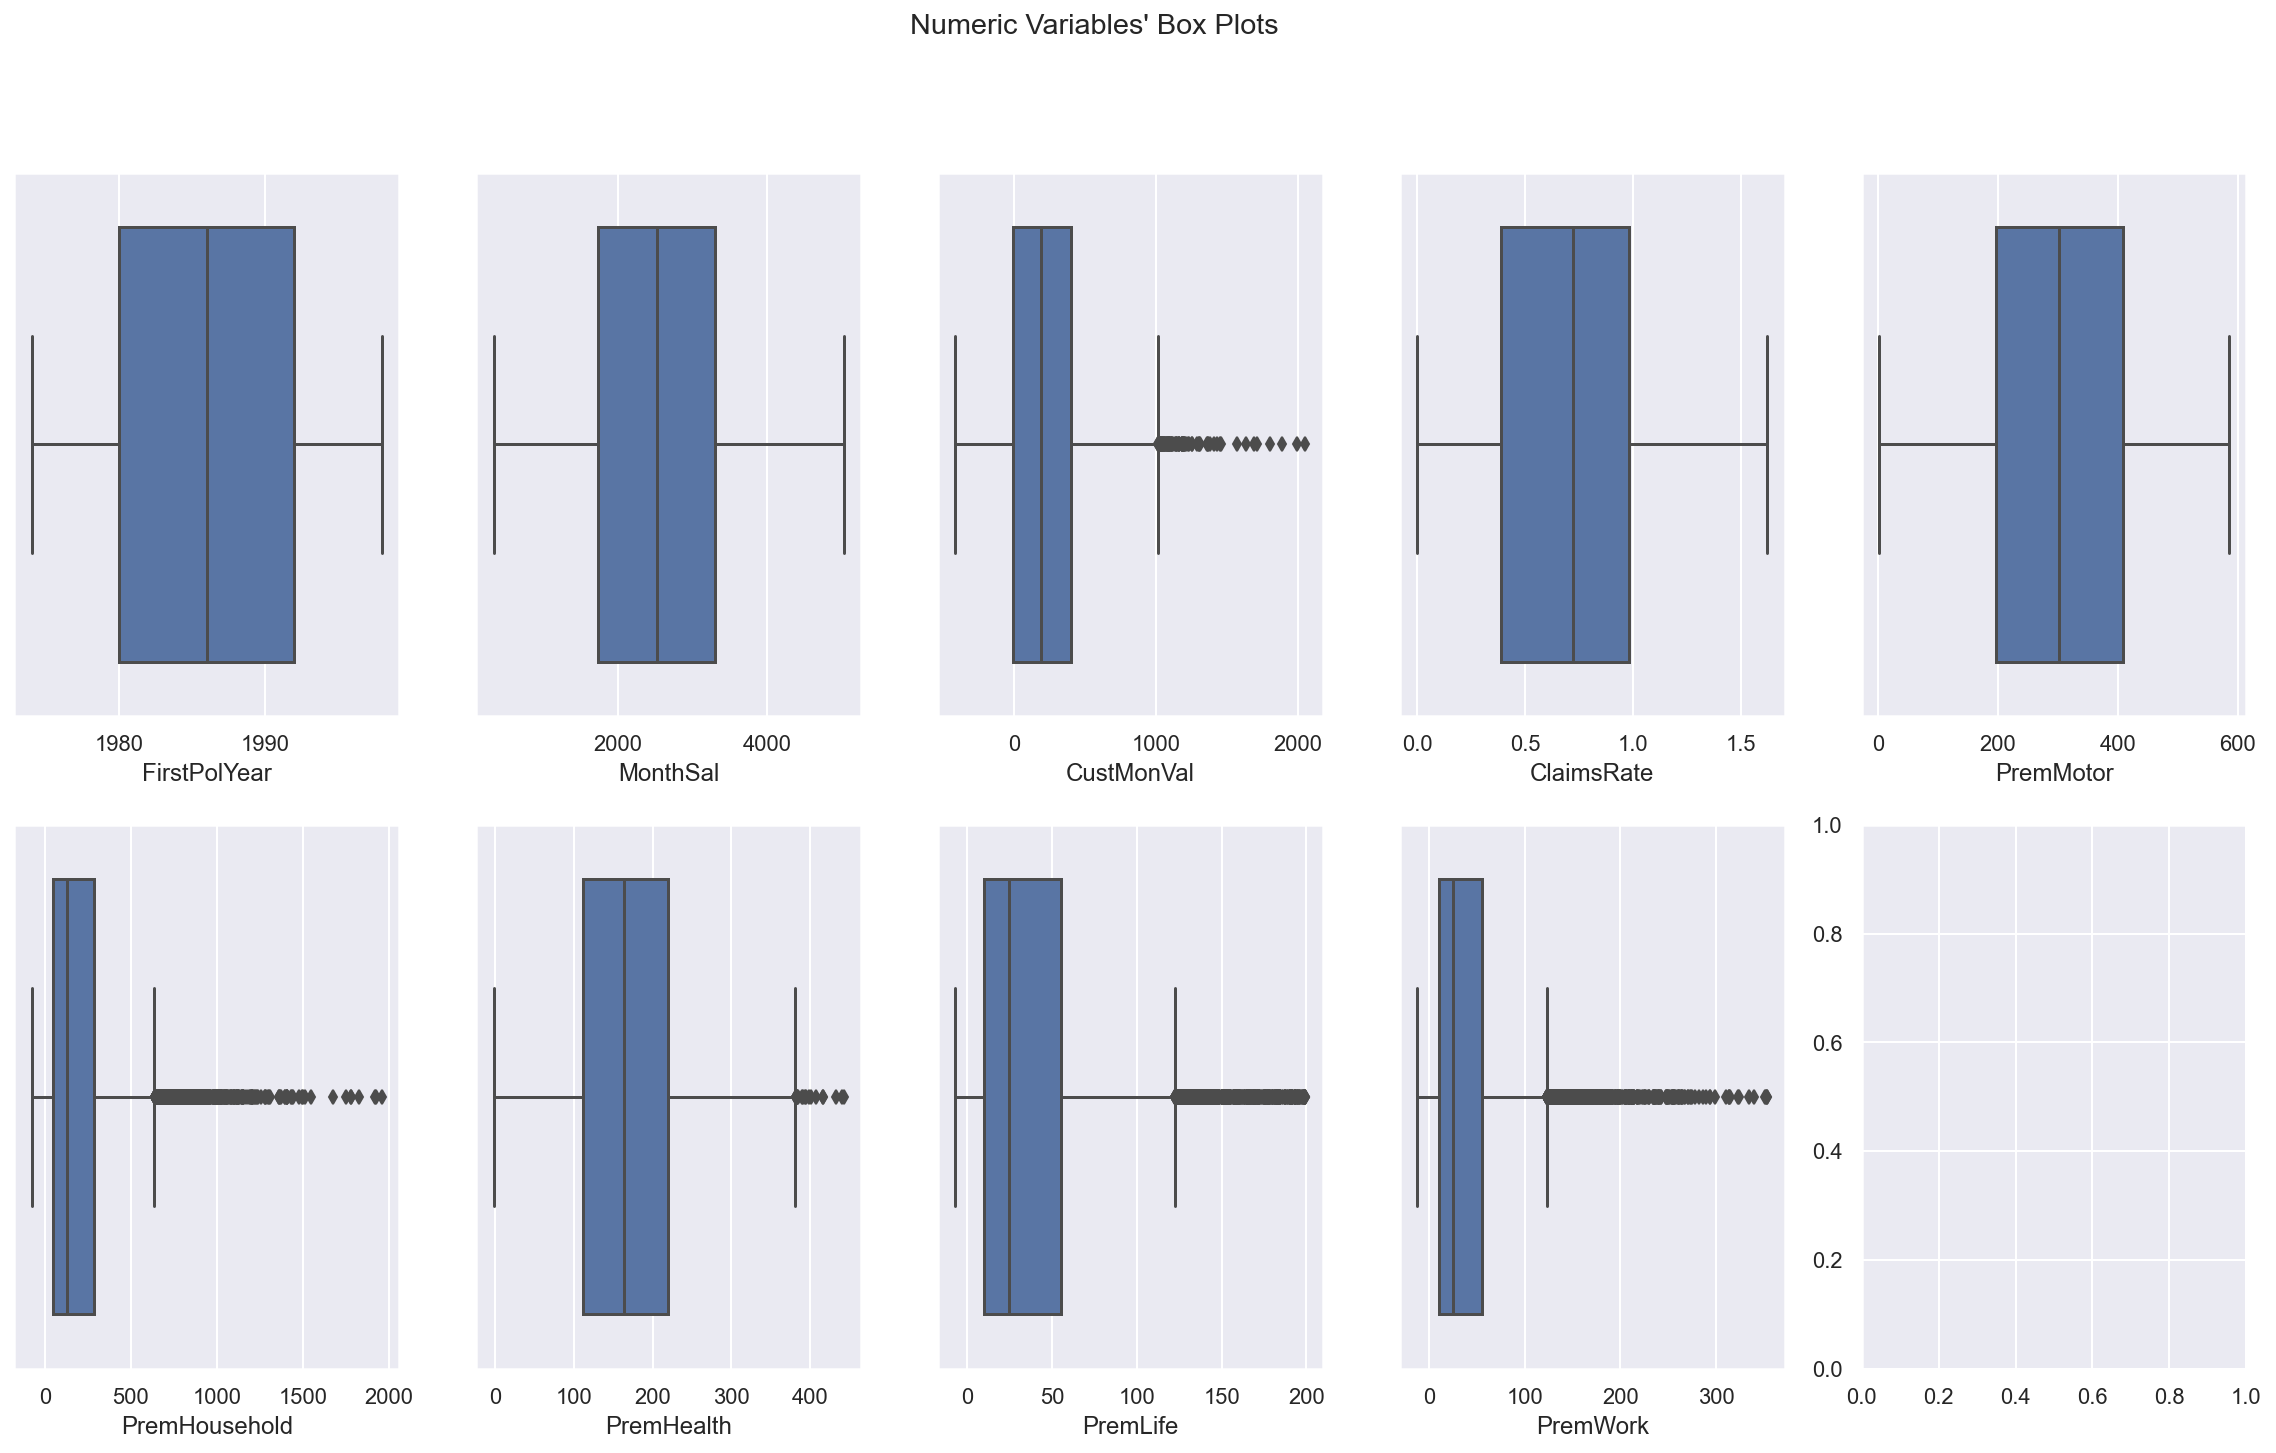

In [284]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data_1[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

#plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

In [285]:
print('Percentage of outliers removed:', (1-np.round((data_1.shape[0] / data_consist.shape[0]), 4))*100)

Percentage of outliers removed: 1.7900000000000027


Text(0.5, 0.98, "Numeric Variables' Histograms")

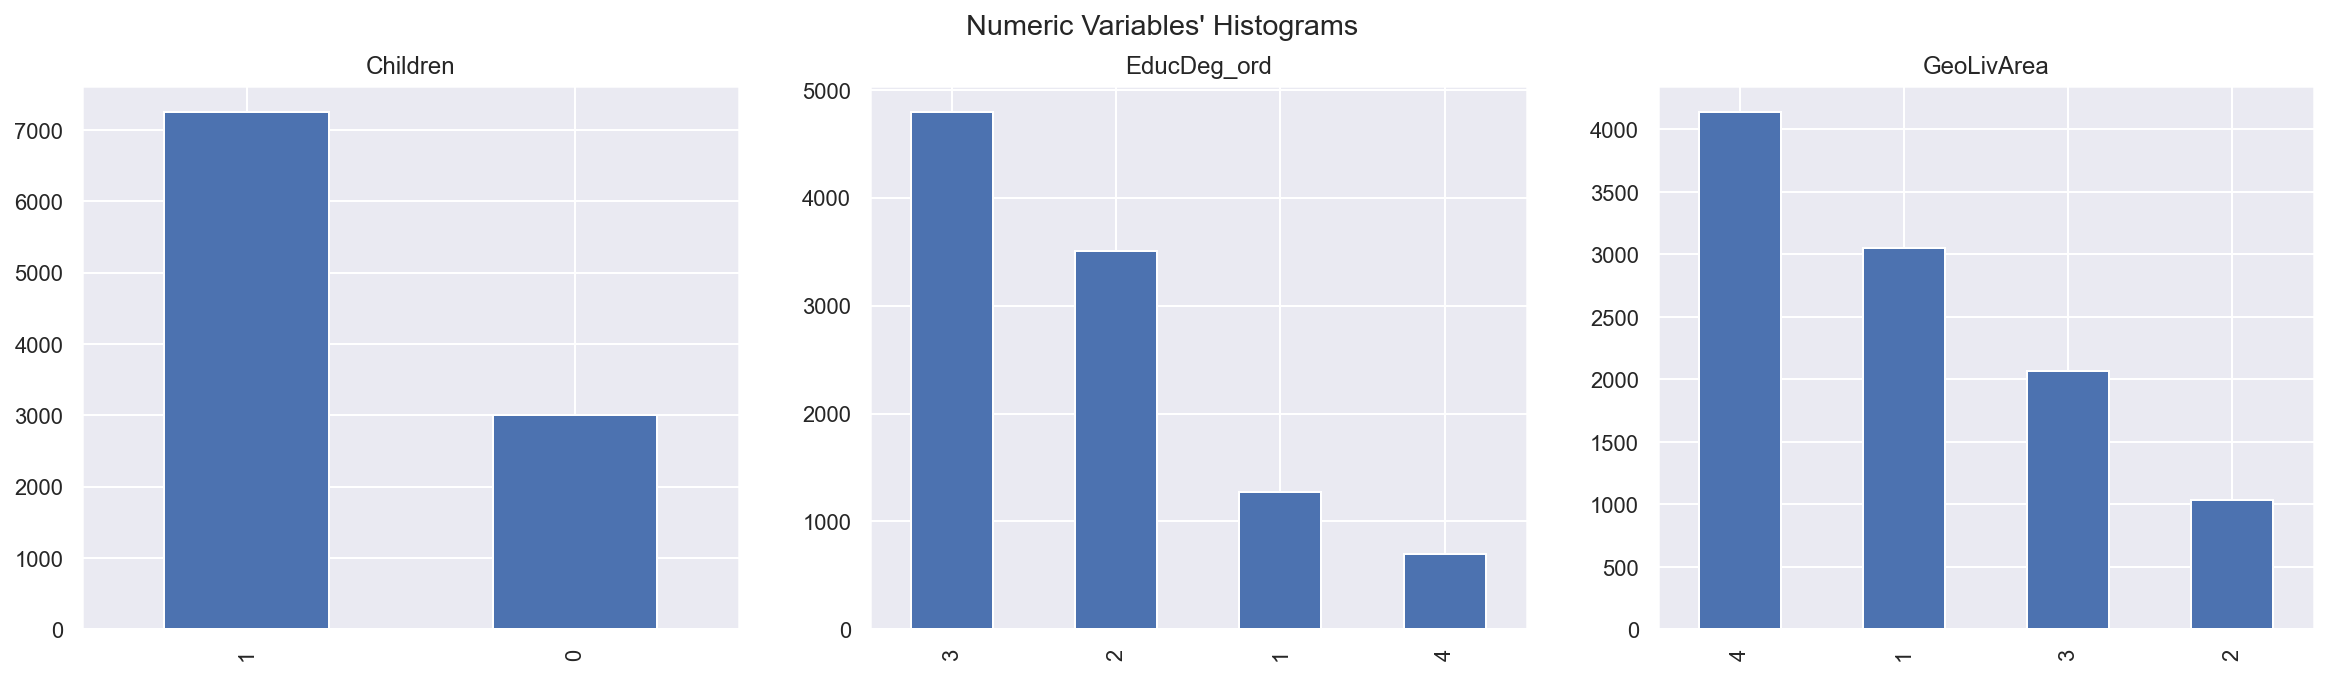

In [286]:
%matplotlib inline

sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, ax = plt.subplots(1, len(non_metric_features),figsize=(20, 5))

for i, categorical_feature in enumerate(data[non_metric_features]):
    data[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)

# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

In [287]:
data_consist.isna().sum()

FirstPolYear      30
MonthSal          36
EducDeg_ord       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

<a class="anchor" id="8th-bullet">

### 2.2.2  IQR Method
    
</a>

In [288]:
data_1

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                               
1.0              1985    2177.0            2           1         1   
2.0              1981     677.0            2           4         1   
3.0              1991    2277.0            1           3         0   
4.0              1990    1099.0            3           4         1   
5.0              1986    1763.0            3           4         1   
...               ...       ...          ...         ...       ...   
10292.0          1984    3188.0            4           2         0   
10293.0          1977    2431.0            1           3         0   
10294.0          1994    2918.0            3           1         1   
10295.0          1981    1971.0            1           2         1   
10296.0          1990    2815.0            4           1         1   

          CustMonVal  ClaimsRate   PremMotor  PremHousehold  PremHealth  \
CustID                                                                    
1.0       380.970001        0.39  375.850006      79.449997  146.360001   
2.0      -131.130005        1.12   77.459999     416.200012  116.690002   
3.0       504.670013        0.28  206.149994          224.5  124.580002   
4.0           -16.99        0.99  182.479996      43.349998  311.170013   
5.0            35.23         0.9  338.619995      47.799999  182.589996   
...              ...         ...         ...            ...         ...   
10292.0        -0.11        0.96   393.73999      49.450001  173.809998   
10293.0  1405.599976         0.0  133.580002        1035.75      143.25   
10294.0   524.099976        0.21  403.630005     132.800003      142.25   
10295.0   250.050003        0.65  188.589996     211.149994  198.369995   
10296.0       463.75        0.27  414.079987      94.449997      141.25   

           PremLife    PremWork  
CustID                           
1.0       47.009998   16.889999  
2.0      194.479996  106.129997  
3.0       86.349998   99.019997  
4.0           35.34       28.34  
5.0       18.780001   41.450001  
...             ...         ...  
10292.0        9.78       14.78  
10293.0       12.89  105.129997  
10294.0       12.67        4.89  
10295.0   63.900002  112.910004  
10296.0        6.89       12.89  

[10108 rows x 12 columns]

In [289]:
def drop_outliers_IQR(df, iqr_mult,  metric_features):
    filters2 = []
    
    for metric in metric_features:
    
        q25 = df[metric].quantile(.25)
        q75 = df[metric].quantile(.75)
        iqr = (q75 - q25)
        upper_lim = q75 + (iqr_mult * iqr)
        lower_lim = q25 - (iqr_mult * iqr)
        filters2.append(df[metric].between(lower_lim, upper_lim, inclusive=True))

    filters2 = pd.Series(np.all(filters2, 0), index=df.index)
    data_2 = df[filters2]
   

    return data_2

In [290]:
metric_features

['FirstPolYear',
 'MonthSal',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']

In [291]:
drop_outliers_IQR(data_consist[metric_features][~np.isnan(data_consist['PremHousehold'])], 4 , ['PremHousehold'])

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_20024/1776084696.py:11: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(df[metric].between(lower_lim, upper_lim, inclusive=True))


FirstPolYear  MonthSal   CustMonVal  ClaimsRate   PremMotor  \
CustID                                                                 
1.0              1985    2177.0   380.970001        0.39  375.850006   
2.0              1981     677.0  -131.130005        1.12   77.459999   
3.0              1991    2277.0   504.670013        0.28  206.149994   
4.0              1990    1099.0       -16.99        0.99  182.479996   
5.0              1986    1763.0        35.23         0.9  338.619995   
...               ...       ...          ...         ...         ...   
10292.0          1984    3188.0        -0.11        0.96   393.73999   
10293.0          1977    2431.0  1405.599976         0.0  133.580002   
10294.0          1994    2918.0   524.099976        0.21  403.630005   
10295.0          1981    1971.0   250.050003        0.65  188.589996   
10296.0          1990    2815.0       463.75        0.27  414.079987   

         PremHousehold  PremHealth    PremLife    PremWork  
CustID                                                      
1.0          79.449997  146.360001   47.009998   16.889999  
2.0         416.200012  116.690002  194.479996  106.129997  
3.0              224.5  124.580002   86.349998   99.019997  
4.0          43.349998  311.170013       35.34       28.34  
5.0          47.799999  182.589996   18.780001   41.450001  
...                ...         ...         ...         ...  
10292.0      49.450001  173.809998        9.78       14.78  
10293.0        1035.75      143.25       12.89  105.129997  
10294.0     132.800003      142.25       12.67        4.89  
10295.0     211.149994  198.369995   63.900002  112.910004  
10296.0      94.449997      141.25        6.89       12.89  

[10255 rows x 9 columns]

In [292]:
outliers = data_consist[~filters1]

In [293]:
data_consist=data_consist[filters1]

In [294]:
data_consist

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                               
1.0              1985    2177.0            2           1         1   
2.0              1981     677.0            2           4         1   
3.0              1991    2277.0            1           3         0   
4.0              1990    1099.0            3           4         1   
5.0              1986    1763.0            3           4         1   
...               ...       ...          ...         ...       ...   
10292.0          1984    3188.0            4           2         0   
10293.0          1977    2431.0            1           3         0   
10294.0          1994    2918.0            3           1         1   
10295.0          1981    1971.0            1           2         1   
10296.0          1990    2815.0            4           1         1   

          CustMonVal  ClaimsRate   PremMotor  PremHousehold  PremHealth  \
CustID                                                                    
1.0       380.970001        0.39  375.850006      79.449997  146.360001   
2.0      -131.130005        1.12   77.459999     416.200012  116.690002   
3.0       504.670013        0.28  206.149994          224.5  124.580002   
4.0           -16.99        0.99  182.479996      43.349998  311.170013   
5.0            35.23         0.9  338.619995      47.799999  182.589996   
...              ...         ...         ...            ...         ...   
10292.0        -0.11        0.96   393.73999      49.450001  173.809998   
10293.0  1405.599976         0.0  133.580002        1035.75      143.25   
10294.0   524.099976        0.21  403.630005     132.800003      142.25   
10295.0   250.050003        0.65  188.589996     211.149994  198.369995   
10296.0       463.75        0.27  414.079987      94.449997      141.25   

           PremLife    PremWork  
CustID                           
1.0       47.009998   16.889999  
2.0      194.479996  106.129997  
3.0       86.349998   99.019997  
4.0           35.34       28.34  
5.0       18.780001   41.450001  
...             ...         ...  
10292.0        9.78       14.78  
10293.0       12.89  105.129997  
10294.0       12.67        4.89  
10295.0   63.900002  112.910004  
10296.0        6.89       12.89  

[10108 rows x 12 columns]

<a class="anchor" id="8th-bullet">

### 2.2.3  Multi-dimentional outliers
    
</a>

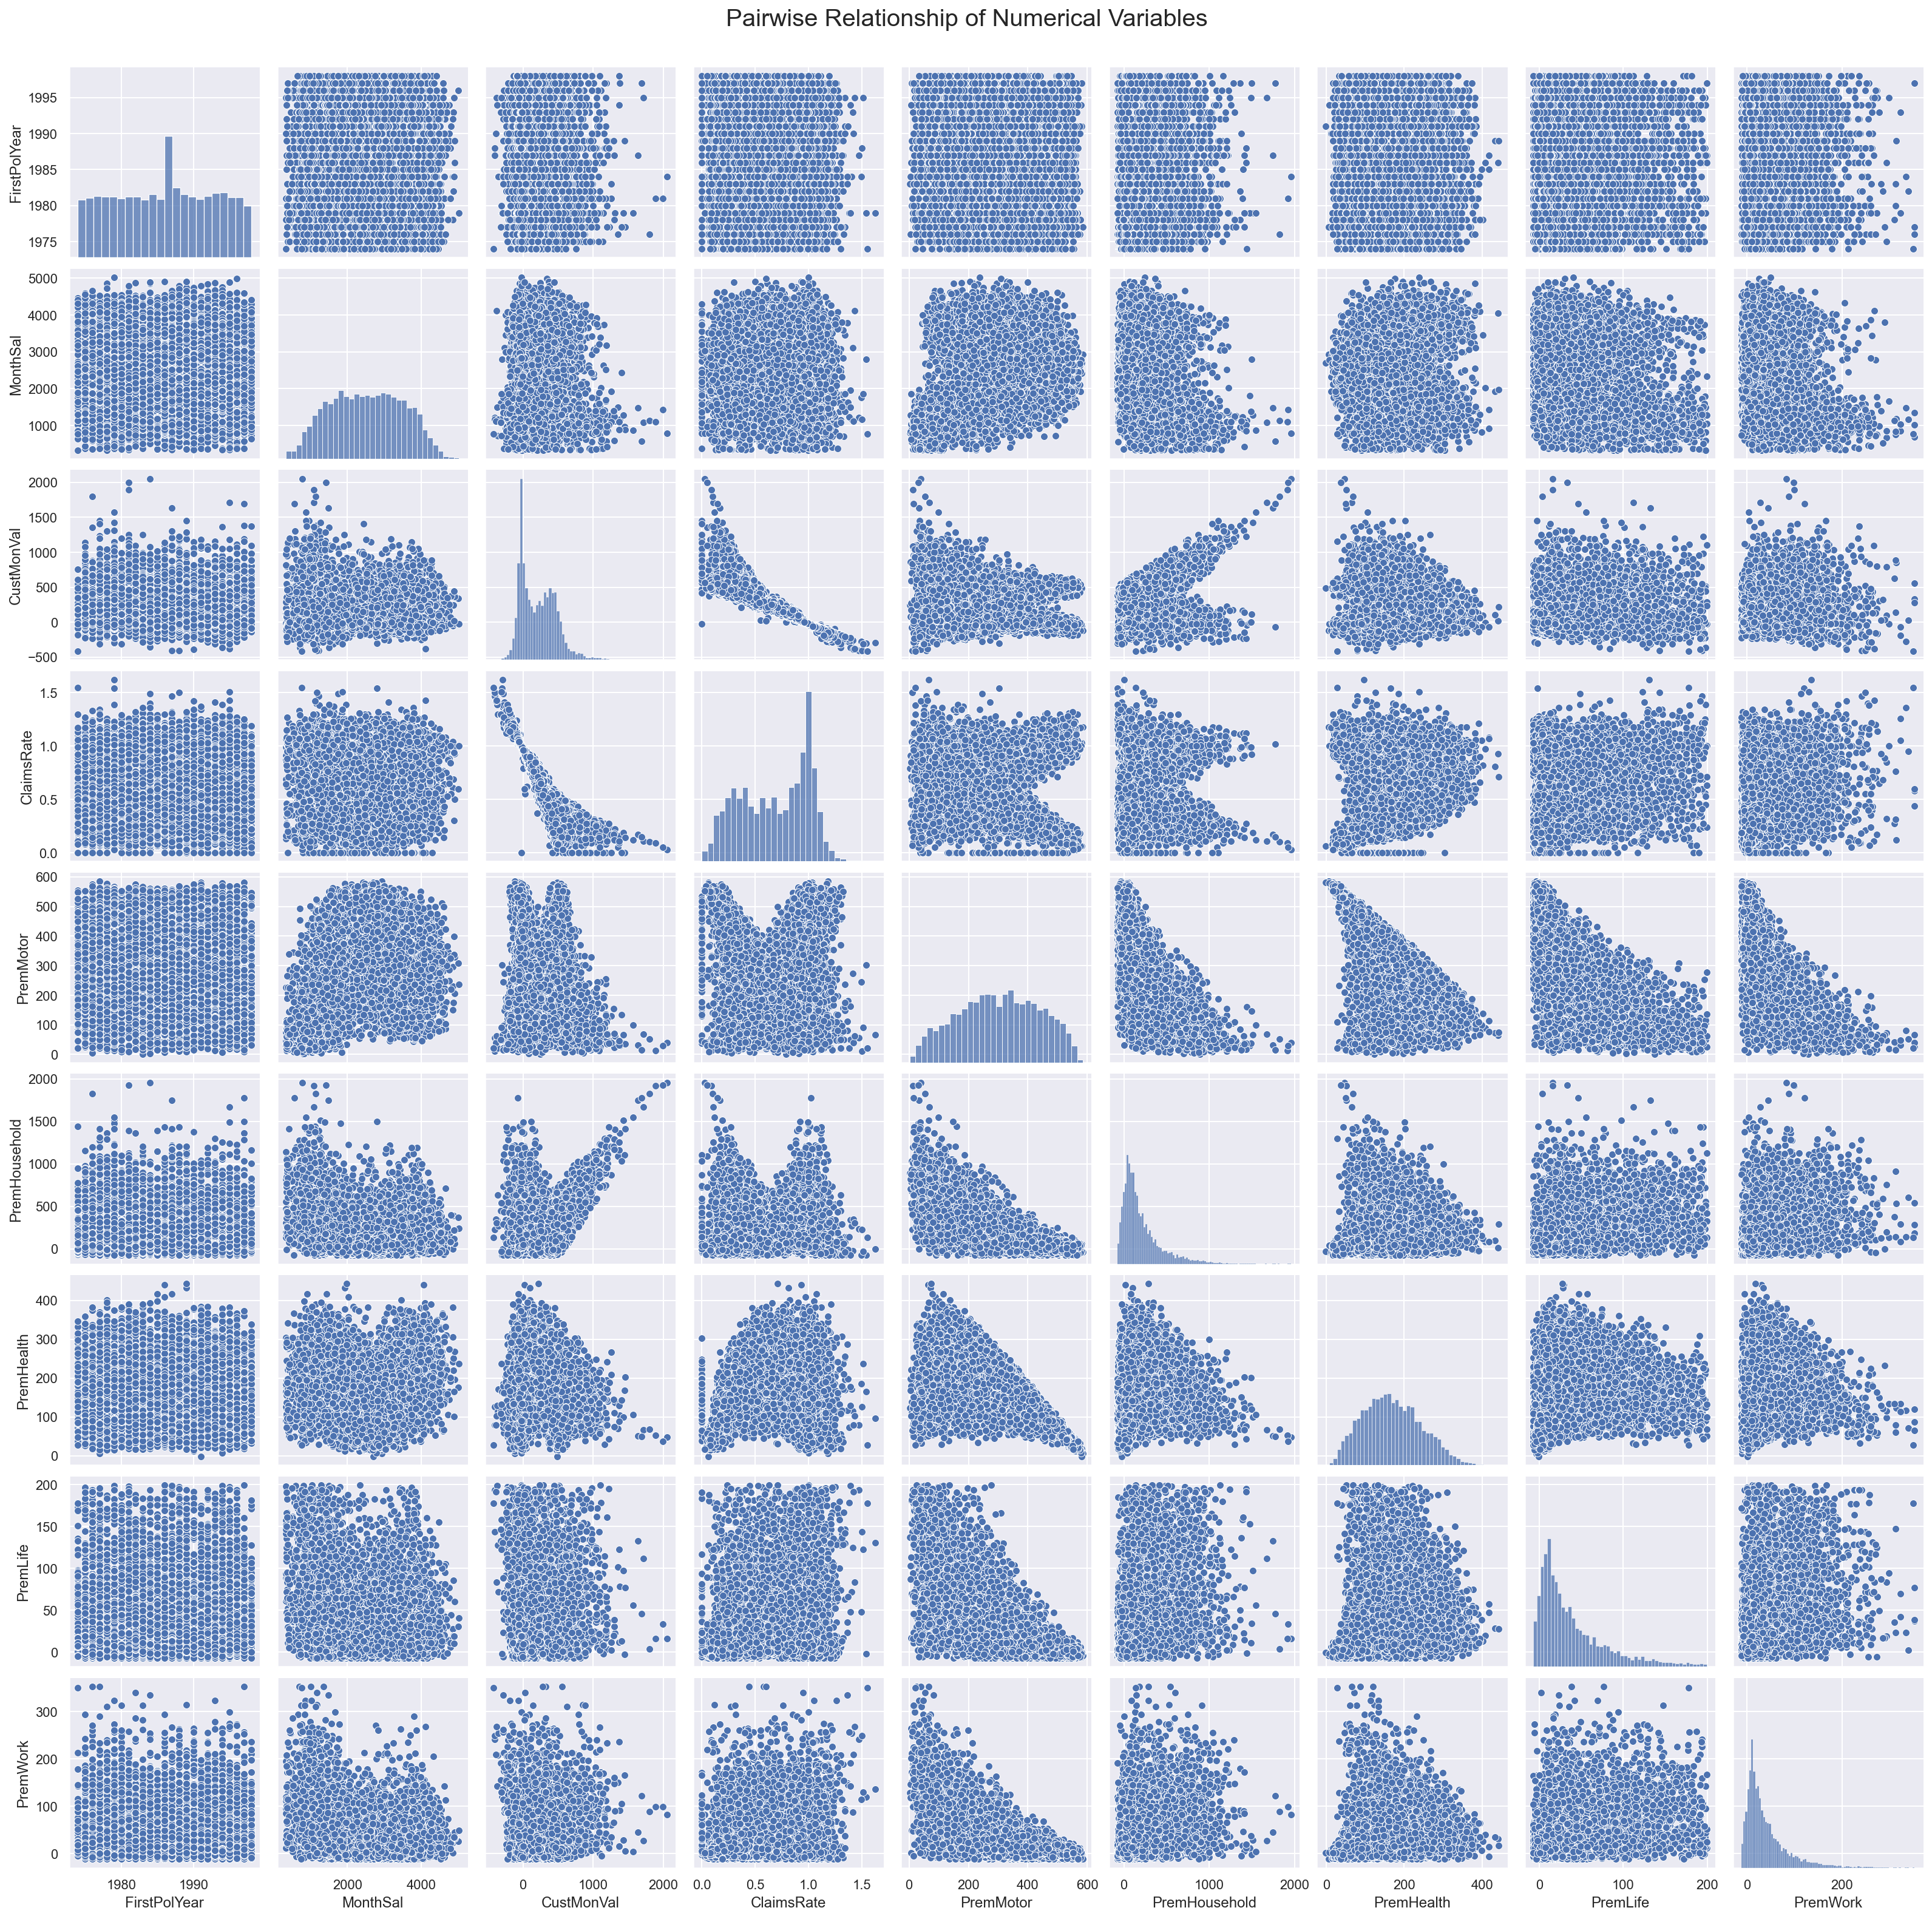

In [296]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(data_consist[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'pairwise_relationship_of_numerical_variables.png'), dpi=200)
plt.show()

In [297]:
data_out_rmv=data_consist.copy()


<a class="anchor" id="9th-bullet">

### 2.5 Scale the data
    
</a>

In [299]:
# scale the data before the missing values imputation due to KNN

from sklearn.preprocessing import MinMaxScaler
# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(data_out_rmv[metric_features])
scaled_feat

array([[0.45833333, 0.39334471, 0.32285089, ..., 0.33366296, 0.26171439,
        0.07911167],
       [0.29166667, 0.07337884, 0.11559009, ..., 0.26698431, 0.9763047 ,
        0.32348431],
       [0.70833333, 0.41467577, 0.37291565, ..., 0.28471584, 0.45234288,
        0.30401446],
       ...,
       [0.83333333, 0.55140785, 0.38077949, ..., 0.32442638, 0.09531424,
        0.04625116],
       [0.29166667, 0.34940273, 0.26986401, ..., 0.45054723, 0.3435577 ,
        0.34205051],
       [0.66666667, 0.52943686, 0.35635421, ..., 0.32217903, 0.0673063 ,
        0.06815817]])

In [300]:
# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

Parameters fitted:
 [ 1.97400000e+03  3.33000000e+02 -4.16730011e+02  0.00000000e+00
  1.77999997e+00 -7.50000000e+01 -2.10999990e+00 -7.00000000e+00
 -1.20000000e+01] 
 [1.99800000e+03 5.02100000e+03 2.05407007e+03 1.62000000e+00
 5.85219971e+02 1.95759998e+03 4.42859985e+02 1.99369995e+02
 3.53179993e+02]


In [301]:
data_out_rmv[metric_features] = scaled_feat
data_out_rmv.head()

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  CustMonVal  \
CustID                                                                          
1.0         0.458333  0.393345            2           1         1    0.322851   
2.0         0.291667  0.073379            2           4         1    0.115590   
3.0         0.708333  0.414676            1           3         0    0.372916   
4.0         0.666667  0.163396            3           4         1    0.161786   
5.0         0.500000  0.305034            3           4         1    0.182921   

        ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  PremWork  
CustID                                                                        
1.0       0.240741   0.641146       0.075986    0.333663  0.261714  0.079112  
2.0       0.691358   0.129713       0.241661    0.266984  0.976305  0.323484  
3.0       0.172840   0.350285       0.147348    0.284716  0.452343  0.304014  
4.0       0.611111   0.309715       0.058226    0.704048  0.205165  0.110466  
5.0       0.555556   0.577334       0.060415    0.415084  0.124921  0.146366

In [302]:
# Checking max and min of minmaxed variables
data_out_rmv[metric_features].describe().round(2).T

count  mean   std  min   25%   50%   75%  max
FirstPolYear   10078.0  0.50  0.28  0.0  0.25  0.50  0.75  1.0
MonthSal       10072.0  0.47  0.21  0.0  0.30  0.47  0.63  1.0
CustMonVal     10108.0  0.26  0.10  0.0  0.16  0.24  0.33  1.0
ClaimsRate     10108.0  0.42  0.20  0.0  0.24  0.44  0.60  1.0
PremMotor      10075.0  0.51  0.23  0.0  0.34  0.52  0.70  1.0
PremHousehold  10108.0  0.14  0.11  0.0  0.06  0.10  0.18  1.0
PremHealth     10066.0  0.38  0.17  0.0  0.26  0.37  0.50  1.0
PremLife       10004.0  0.22  0.20  0.0  0.08  0.15  0.30  1.0
PremWork       10022.0  0.14  0.13  0.0  0.06  0.10  0.19  1.0

<a class="anchor" id="10th-bullet">

### 2.1. Missing Values
    
</a>

In [303]:
# Checking maximum number of nan in a record
maxi=0
ind_max=0
for i in data_out_rmv.index:
    if data_out_rmv.loc[i,:].isna().sum()>maxi:
        maxi=data_out_rmv.loc[i,:].isna().sum()
        ind_max=i
print(maxi,ind_max)

#decided not to drop the record since there are many more features.

4 863.0


In [304]:
check_nan_feature=pd.DataFrame(data_out_rmv.isna().sum()).rename(columns={0:'Nr_missings'})
#check_nan_feature.columns.values[0]="Nr_missings"
print(check_nan_feature)
check_nan_feature['perc']=check_nan_feature['Nr_missings']/len(data_out_rmv) *100

               Nr_missings
FirstPolYear            30
MonthSal                36
EducDeg_ord             17
GeoLivArea               1
Children                21
CustMonVal               0
ClaimsRate               0
PremMotor               33
PremHousehold            0
PremHealth              42
PremLife               104
PremWork                86


In [305]:
check_nan_feature
# there is no feature with more than 20% of nan values-- no feature will be removed

Nr_missings      perc
FirstPolYear            30  0.296795
MonthSal                36  0.356154
EducDeg_ord             17  0.168184
GeoLivArea               1  0.009893
Children                21  0.207756
CustMonVal               0  0.000000
ClaimsRate               0  0.000000
PremMotor               33  0.326474
PremHousehold            0  0.000000
PremHealth              42  0.415512
PremLife               104  1.028888
PremWork                86  0.850811

In [306]:
# Filled nan values in insurance expenses with 0
data_out_rmv['PremMotor'].fillna(0, inplace = True)
data_out_rmv['PremHealth'].fillna(0, inplace = True)
data_out_rmv['PremLife'].fillna(0, inplace = True)
data_out_rmv['PremWork'].fillna(0, inplace = True)

In [307]:
data_out_rmv['GeoLivArea'].value_counts()
mode_geo = data['GeoLivArea'].mode().loc[0]
data_out_rmv['GeoLivArea'].fillna(mode_geo, inplace=True)

In [308]:
data_out_rmv.isna().sum()

FirstPolYear     30
MonthSal         36
EducDeg_ord      17
GeoLivArea        0
Children         21
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

In [86]:
#data_out_rmv=data_out_rmv[~((data_out_rmv['FirstPolYear'].isna()) & (data_out_rmv['BirthYear'].isna()))]

In [309]:
from sklearn.impute import KNNImputer

# KNNImputer - only works for numerical varaibles
imputer = KNNImputer(n_neighbors=5, weights="distance")
data_out_rmv['MonthSal'] = imputer.fit_transform(data_out_rmv[['MonthSal']])

In [311]:
# imputer = KNNImputer(n_neighbors=5, weights="distance")
# data_out_rmv['BirthYear'] = imputer.fit_transform(data_out_rmv[['BirthYear']])

In [312]:
imputer = KNNImputer(n_neighbors=5, weights="distance")
data_out_rmv['FirstPolYear'] = imputer.fit_transform(data_out_rmv[['FirstPolYear']])

In [313]:
data_out_rmv['EducDeg_ord'].value_counts()

3    4776
2    3445
1    1174
4     696
Name: EducDeg_ord, dtype: Int64

In [314]:
metric_features

['FirstPolYear',
 'MonthSal',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']

In [326]:
from sklearn.neighbors import KNeighborsClassifier

In [347]:
data_out_rmv

FirstPolYear  MonthSal  EducDeg_ord  GeoLivArea  Children  \
CustID                                                               
1.0          0.458333  0.393345            2           1         1   
2.0          0.291667  0.073379            2           4         1   
3.0          0.708333  0.414676            1           3         0   
4.0          0.666667  0.163396            3           4         1   
5.0          0.500000  0.305034            3           4         1   
...               ...       ...          ...         ...       ...   
10292.0      0.416667  0.609002            4           2         0   
10293.0      0.125000  0.447526            1           3         0   
10294.0      0.833333  0.551408            3           1         1   
10295.0      0.291667  0.349403            1           2         1   
10296.0      0.666667  0.529437            4           1         1   

         CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
CustID                                                                  
1.0        0.322851    0.240741   0.641146       0.075986    0.333663   
2.0        0.115590    0.691358   0.129713       0.241661    0.266984   
3.0        0.372916    0.172840   0.350285       0.147348    0.284716   
4.0        0.161786    0.611111   0.309715       0.058226    0.704048   
5.0        0.182921    0.555556   0.577334       0.060415    0.415084   
...             ...         ...        ...            ...         ...   
10292.0    0.168617    0.592593   0.671809       0.061227    0.395353   
10293.0    0.737547    0.000000   0.225902       0.546468    0.326674   
10294.0    0.380779    0.129630   0.688760       0.102234    0.324426   
10295.0    0.269864    0.401235   0.320187       0.140780    0.450547   
10296.0    0.356354    0.166667   0.706671       0.083366    0.322179   

         PremLife  PremWork  
CustID                       
1.0      0.261714  0.079112  
2.0      0.976305  0.323484  
3.0      0.452343  0.304014  
4.0      0.205165  0.110466  
5.0      0.124921  0.146366  
...           ...       ...  
10292.0  0.081310  0.073334  
10293.0  0.096380  0.320746  
10294.0  0.095314  0.046251  
10295.0  0.343558  0.342051  
10296.0  0.067306  0.068158  

[10108 rows x 12 columns]

In [352]:
missings_educ = data_out_rmv[data_out_rmv['EducDeg_ord'].isna()].drop(['EducDeg_ord','Children'], axis=1)
input_data_educ = data_out_rmv[~data_out_rmv[['EducDeg_ord','Children']].isna()]

X_knn_educ = input_data_educ.drop(['EducDeg_ord','Children'], axis=1)
y_knn_educ = input_data_educ['EducDeg_ord']
y_knn_educ = y_knn_educ.astype('int')

ValueError: cannot convert to 'int32'-dtype NumPy array with missing values. Specify an appropriate 'na_value' for this dtype.

In [345]:
from sklearn.model_selection import train_test_split
X_train_knn_educ, X_val_knn_educ, y_train_knn_educ, y_val_knn_educ = train_test_split(X_knn_educ, y_knn_educ, train_size=0.7, stratify = y_knn_educ, random_state=5)

In [343]:
modelKNN = KNeighborsClassifier()
modelKNN.fit(X = X_train_knn_educ, y = y_train_knn_educ)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
labels_train = modelKNN.predict(X_train_knn_educ)
labels_val = modelKNN.predict(X_val_knn_educ)
labels_val

In [ ]:
print(modelKNN.score(X_train_knn_educ, y_train_knn_educ))
print(modelKNN.score(X_val_knn_educ, y_val_knn_educ))

In [ ]:
modelKNN.kneighbors(X = X_val)

In [91]:
data_out_rmv['EducDeg_ord'].value_counts()
mode_educ = data_out_rmv['EducDeg_ord'].mode().loc[0]
data_out_rmv['EducDeg_ord'].fillna(mode_educ, inplace=True)

In [92]:
data_out_rmv.isna().sum()

FirstPolYear      0
BirthYear         0
MonthSal          0
EducDeg_ord       0
GeoLivArea        0
Children         18
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

In [93]:
input_data=data_out_rmv.copy()

In [122]:
missings_children= input_data[input_data['Children'].isna()].drop('Children', axis=1)
input_data_log=input_data[~input_data['Children'].isna()]
X_input_data_log=input_data_log.drop('Children', axis=1)
y_log=pd.DataFrame(input_data_log['Children'])
y_log=y_log.astype('int')


from sklearn.model_selection import train_test_split
X_train, X_val,y_train,y_val = train_test_split(X_input_data_log,y_log,test_size=0.3,random_state=5, stratify=y_log)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Utilizador\anaconda3\envs\datamining\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Utilizador\anaconda3\envs\datamining\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
y_pred = lr.predict(X_val)
y_pred
pred_prob = lr.predict_proba(X_val)
pred_prob

array([[0.21495388, 0.78504612],
       [0.07260028, 0.92739972],
       [0.81518148, 0.18481852],
       ...,
       [0.10979437, 0.89020563],
       [0.04046175, 0.95953825],
       [0.61924237, 0.38075763]])

In [124]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
cm

array([[ 591,  186],
       [ 136, 1520]], dtype=int64)

In [125]:
from sklearn.metrics import recall_score
recall_score(y_val, y_pred)

0.9178743961352657

In [126]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.8676531031648171

In [127]:
from sklearn.metrics import f1_score
f1 = f1_score(y_val, y_pred)
f1

0.9042236763831053

In [128]:
from sklearn.metrics import precision_score
precision = precision_score(y_val, y_pred)
precision

0.8909730363423212

In [130]:
imputed_children= lr.predict(missings_children)
imputed_children

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [133]:
data_out_rmv.dropna(subset = ['Children'], inplace = True)

In [134]:
data_out_rmv.isna().sum()

FirstPolYear     0
BirthYear        0
MonthSal         0
EducDeg_ord      0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64

In [135]:
data_out_miss=data_out_rmv.copy()

<a class="anchor" id="10th-bullet">

### 2.1.1 KNN
    
</a>


<a class="anchor" id="11th-bullet">

### 2.1.2 Median, Mode
    
</a>



<a class="anchor" id="12th-bullet">

### 2.4. Feature Engineering
    
</a>




In [136]:
##### criar variavel no inicio - current_year=2016
#data_out_miss['age']=2016-data_out_miss['BirthYear']

In [137]:
data_out_miss['year_cust']=2016-data_out_miss['FirstPolYear']

In [141]:
data_out_miss['Total_Premiums']=data_out_miss.loc[:,['PremMotor','PremHousehold','PremHealth','PremLife','PremWork']][data_out_miss>0].sum(1)
#remove Total_Premiums==0

In [252]:
data_out_miss['annual_profit']=data_out_miss['CustMonVal']/data_out_miss['year_cust']

In [253]:
## using ln
data_out_miss['log_monthSal']=np.log10(data_out_miss['MonthSal'])

C:\Users\Utilizador\anaconda3\envs\datamining\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [143]:
# ver numeros negativos em PREM

data_out_miss['log_cusMon']=np.log10(data_out_miss['CustMonVal']-np.max(data_out_miss['CustMonVal']+1)).
data_out_miss['log_claims']=np.log10(data_out_miss['ClaimsRate'])
data_out_miss['log_health']=np.log10(data_out_miss['PremHealth'])
data_out_miss['log_household']=np.log10(data_out_miss['PremHousehold']-np.max(data_out_miss['PremHousehold']+1))
data_out_miss['log_life']=np.log10(data_out_miss['PremLife']-np.max(data_out_miss['PremLife']+1))
data_out_miss['log_motor']=np.log10(data_out_miss['PremMotor'])
data_out_miss['log_work']=np.log10(data_out_miss['PremWork']-np.max(data_out_miss['PremWork']+1))

data_out_miss['AnnualSal']=data_out_miss['MonthSal']*12

data_out_miss['perc_inc_health']=data_out_miss['PremHealth']/data_out_miss['AnnualSal']
data_out_miss['perc_inc_household']=data_out_miss['PremHousehold']/data_out_miss['AnnualSal']
data_out_miss['perc_inc_life']=data_out_miss['PremLife']/data_out_miss['AnnualSal']
data_out_miss['perc_inc_motor']=data_out_miss['PremMotor']/data_out_miss['AnnualSal']
data_out_miss['perc_inc_work']=data_out_miss['PremWork']/data_out_miss['AnnualSal']




In [144]:
data_out_miss.describe().T

count         mean       std          min          25%  \
FirstPolYear        8108.0     0.536902  0.270839     0.000000     0.333333   
BirthYear           8108.0     0.444769  0.234344     0.000000     0.258065   
MonthSal            8108.0     0.519535  0.182677     0.000000     0.382018   
EducDeg_ord         8108.0     2.580168  0.743782     1.000000     2.000000   
GeoLivArea          8108.0     2.715713  1.264936     1.000000     1.000000   
Children            8108.0     0.680686  0.466240     0.000000     0.000000   
CustMonVal          8108.0     0.328593  0.131765     0.000000     0.205485   
ClaimsRate          8108.0     0.438134  0.208101     0.000000     0.246753   
PremMotor           8108.0     0.555814  0.215106     0.000000     0.390775   
PremHousehold       8108.0     0.151234  0.116597     0.000000     0.072757   
PremHealth          8108.0     0.370607  0.168121     0.000000     0.243005   
PremLife            8108.0     0.241512  0.198631     0.000000     0.095910   
PremWork            8108.0     0.142430  0.117506     0.000000     0.066570   
age                 8108.0  2015.555231  0.234344  2015.000000  2015.370968   
year_cust           8108.0  2015.463098  0.270839  2015.000000  2015.208333   
Total_Premiums      8108.0     1.461596  0.230459     0.047678     1.292312   
log_cusMon          8108.0         -inf       NaN         -inf    -1.582380   
log_claims          8108.0         -inf       NaN         -inf    -1.399366   
log_health          8108.0         -inf       NaN         -inf    -1.414673   
log_household       8108.0         -inf       NaN         -inf    -2.620634   
log_life            8108.0         -inf       NaN         -inf    -2.344347   
log_motor           8108.0         -inf       NaN         -inf    -0.939623   
log_work            8108.0         -inf       NaN         -inf    -2.709501   
AnnualSal           8108.0     6.234422  2.192129     0.000000     4.584212   
perc_inc_health     8108.0          inf       NaN     0.000000     0.038067   
perc_inc_household  8108.0          inf       NaN     0.000000     0.011755   
perc_inc_life       8108.0          inf       NaN     0.000000     0.015945   
perc_inc_motor      8108.0          inf       NaN     0.000000     0.057751   
perc_inc_work       8108.0          inf       NaN     0.000000     0.010548   

                            50%          75%           max  
FirstPolYear           0.541667     0.791667  1.000000e+00  
BirthYear              0.435484     0.629032  1.000000e+00  
MonthSal               0.523876     0.660841  1.000000e+00  
EducDeg_ord            3.000000     3.000000  4.000000e+00  
GeoLivArea             3.000000     4.000000  4.000000e+00  
Children               1.000000     1.000000  1.000000e+00  
CustMonVal             0.316515     0.432858  1.000000e+00  
ClaimsRate             0.467532     0.636364  1.000000e+00  
PremMotor              0.561770     0.726800  1.000000e+00  
PremHousehold          0.116907     0.197451  1.000000e+00  
PremHealth             0.357889     0.486010  1.000000e+00  
PremLife               0.177520     0.329984  1.000000e+00  
PremWork               0.108438     0.184670  1.000000e+00  
age                 2015.564516  2015.741935  2.016000e+03  
year_cust           2015.458333  2015.666667  2.016000e+03  
Total_Premiums         1.425908     1.597458  2.341679e+00  
log_cusMon            -1.150384    -0.837346  0.000000e+00  
log_claims            -0.760286    -0.451985 -1.110223e-16  
log_health            -1.027532    -0.721525  0.000000e+00  
log_household         -2.146380    -1.622266  0.000000e+00  
log_life              -1.728671    -1.108711  0.000000e+00  
log_motor             -0.576663    -0.319104  0.000000e+00  
log_work              -2.221577    -1.689185  0.000000e+00  
AnnualSal              6.286513     7.930092  1.200000e+01  
perc_inc_health        0.055677     0.081443           inf  
perc_inc_household     0.019555     0.034127           inf  
per


<a class="anchor" id="13th-bullet">

### 2.6 Feature Selection
    
</a>


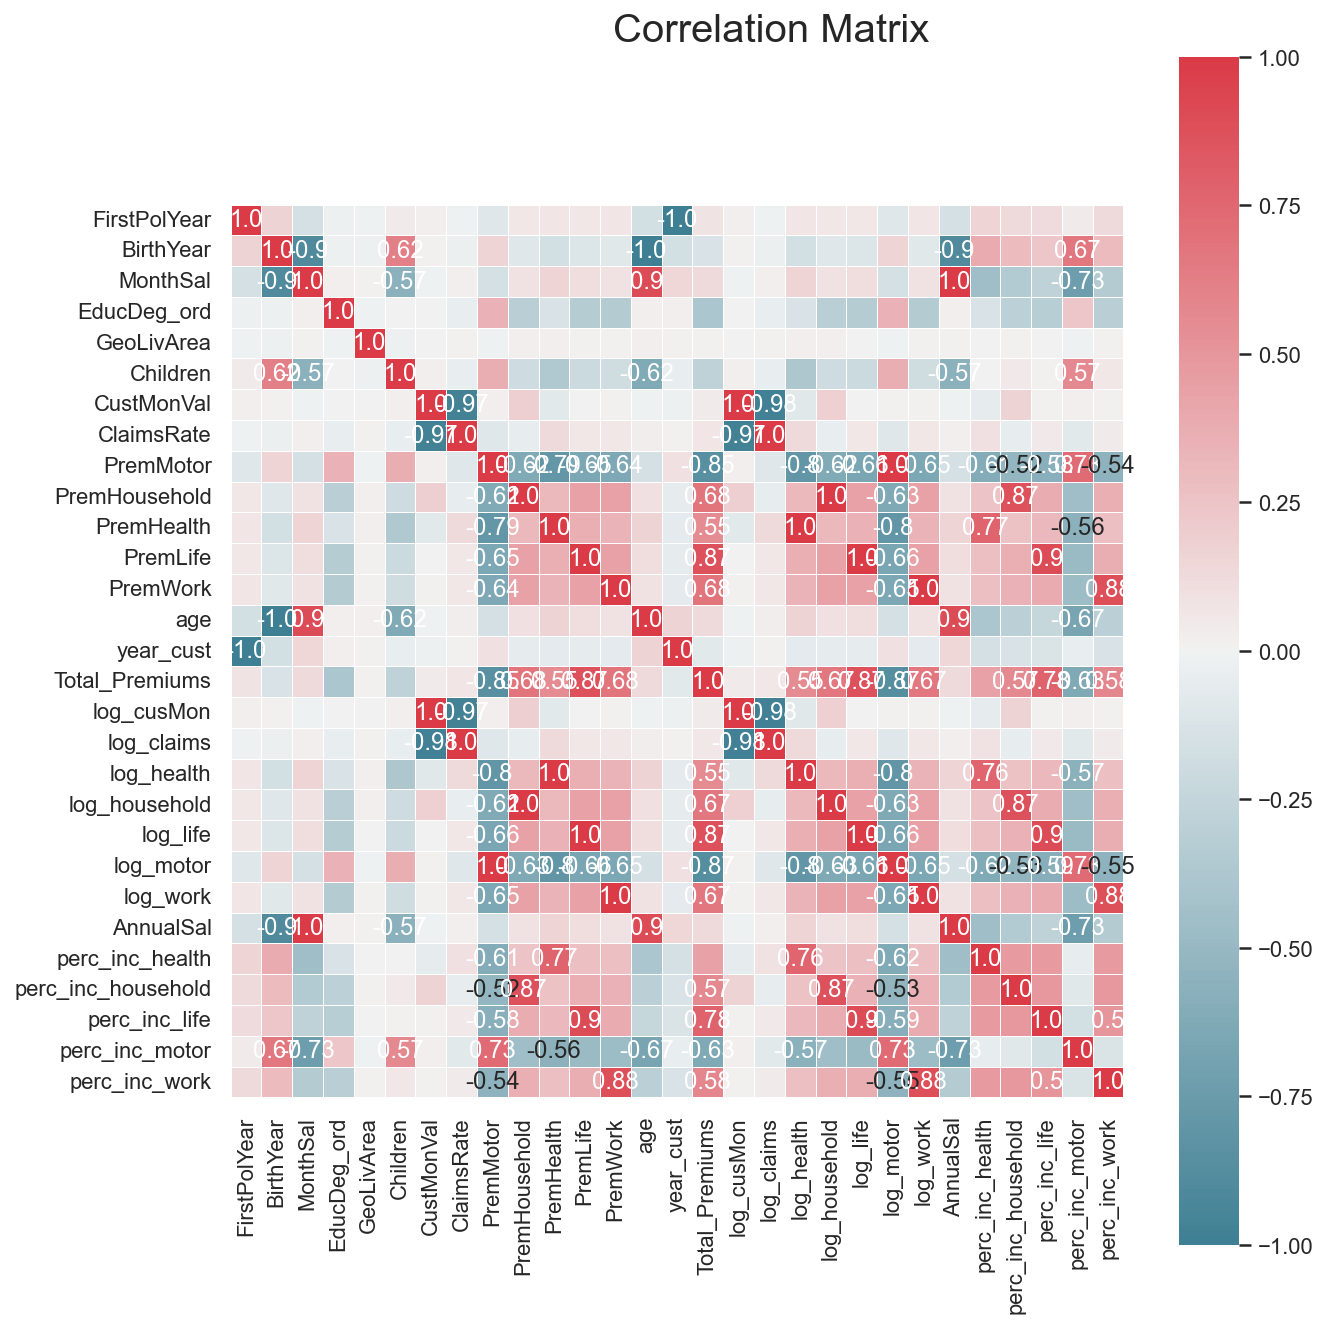

In [145]:
# Prepare figure
fig = plt.figure(figsize=(10, 10))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data_out_miss.corr(method="spearman"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'correlation_matrix.png'), dpi=200)

plt.show()

In [354]:
non_metric_features

['Children', 'EducDeg_ord', 'GeoLivArea']

In [ ]:
IQR - HELENA
KNN: EDUC -- DANIEL
LOG: CHILDREN -- HELENA
ONE-HOT ENCODING: EducDeg_ord, GeoLivArea -- FILIPA
correlaçoes entre variaveis binarias e continuas -- FILIPA

Coeherence Check
Outliers
2.2.1 Manual Filter
2.2.2 IQR method
2.2.3 Multi-dimentional outliers
Scale the data
Missing Values
2.4.1 KNN
2.4.2 Mode
Feature Engineering
Scale the data
